In [1]:
import os
import pandas as pd

#df1 will read Trip Data from August 2018 till January 2020
#df2 will pull trip data from February 2020 till January 2021
#df3 will pull Louisville weather data from August 2018 - January 2021
df1 = pd.read_csv(r'C:\Users\abhir\OneDrive\Documents\DS\DS Career Track docs\Free Data Sets\City of Louisville - escooter data\Data Files\DocklessTripOpenData_10.csv', parse_dates = ['StartDate'])
df2 = pd.read_csv(r'C:\Users\abhir\OneDrive\Documents\DS\DS Career Track docs\Free Data Sets\City of Louisville - escooter data\Data Files\fuzzed-trips.csv', parse_dates = ['StartDate'])
df3 = pd.read_excel(r'C:\Users\abhir\OneDrive\Documents\DS\DS Career Track docs\Free Data Sets\City of Louisville - escooter data\City_of_Louisville_ Weather_data.xlsx', parse_dates = ['Day'])

print(df1.head())


                             TripID  StartDate StartTime     EndDate EndTime  \
0  0000045c-2677-3a7d-4b73-cad99a57 2019-06-26     19:30   6/26/2019   19:30   
1  0000487b-92e6-50d6-7569-42ed3818 2019-09-22     14:30   9/22/2019   14:30   
2  00006088-2579-e0d0-6a30-a15bb878 2019-08-21     17:30   8/21/2019   17:30   
3  00008c1a-899b-8596-970f-9f6bf495 2019-07-03     11:00    7/3/2019   11:15   
4  00009301-3225-2aea-a84a-165a480a 2019-11-22     10:45  11/22/2019   11:00   

   TripDuration  TripDistance  StartLatitude  StartLongitude  EndLatitude  \
0             3         0.000         38.253         -85.756       38.253   
1             5         0.000         38.203         -85.752       38.204   
2             6         0.330         38.259         -85.733       38.265   
3             6         0.640         38.217         -85.757       38.221   
4             7         0.599         38.215         -85.759       38.222   

   EndLongitude  DayOfWeek  HourNum  
0       -85.755   

In [2]:
print(df3.head()) #ºF

         Day  High   Low Precip.  Snow  Unnamed: 5  Unnamed: 6
0        NaT    ºF    ºF    inch  inch         NaN         NaN
1 2018-08-01    82    70    0.94     0         NaN         NaN
2 2018-08-02    84    70       0     0         NaN         NaN
3 2018-08-03  89.1  69.1       0     0         NaN         NaN
4 2018-08-04    91    72       0     0         NaN         NaN


In [3]:
#df3.drop(['Unnamed: 5', 'Unnamed: 6'], axis = 1, inplace=True)
df3.drop(0, axis = 0, inplace=True)
df3.rename(columns={'Day':'Date','High':'HighºF', 'Low':'LowºF', 'Precip.':'Precip.(inch)', 'Snow':'Snow(inch)'}, inplace=True)
#df3.reset_index(inplace=True)
print(df3.head())

        Date HighºF LowºF Precip.(inch) Snow(inch)  Unnamed: 5  Unnamed: 6
1 2018-08-01     82    70          0.94          0         NaN         NaN
2 2018-08-02     84    70             0          0         NaN         NaN
3 2018-08-03   89.1  69.1             0          0         NaN         NaN
4 2018-08-04     91    72             0          0         NaN         NaN
5 2018-08-05     93    73             0          0         NaN         NaN


In [4]:
print(df2.head())

                                 TripID                 StartDate  StartTime  \
0  81984511-f6ef-5484-9217-1ad2eaf459fa 2020-02-01 11:00:00+00:00        NaN   
1  64d25cd4-d3a0-5b01-9d9b-13e7f5ce3329 2020-02-01 11:00:00+00:00        NaN   
2  21a9ff20-081b-5bf7-b9b5-997168cf9a91 2020-02-01 11:00:00+00:00        NaN   
3  f8df92a8-44da-5306-944d-e9020e681f47 2020-02-01 11:15:00+00:00        NaN   
4  7748f3cc-ddf7-5986-8296-0cc132b6b3b9 2020-02-01 11:15:00+00:00        NaN   

                    EndDate  EndTime  TripDuration  TripDistance  \
0  2020-02-01T11:15:00.000Z      NaN             4         0.407   
1  2020-02-01T11:00:00.000Z      NaN             0         0.000   
2  2020-02-01T11:15:00.000Z      NaN             3         0.303   
3  2020-02-01T11:30:00.000Z      NaN            14         0.890   
4  2020-02-01T11:15:00.000Z      NaN             5         0.761   

   StartLatitude  StartLongitude  EndLatitude  EndLongitude  DayOfWeek  \
0         38.226         -85.769    

If you observe carefully the format of data in **StartDate** & **EndDate** columns in both **df1** & **df2** DataFrames are different. **df1** has its date format as **'YYYY-MM-DD'**, whereas **df2** has its date format as **'YYYY-MM-DD'T'HH:mm:ss.SSS'Z''**. We need to make changes to **StartDate** & **StartDate** columns in the **df2** DataFrame to reflecct the same format as that of in **df1** DataFrame.

In [5]:
#type(df2['StartDate'])
df2['StartDate'] = pd.to_datetime(df2['StartDate'])
df2['EndDate'] = pd.to_datetime(df2['EndDate'])
df2['StartDate'] = df2['StartDate'].dt.strftime('%Y-%m-%d')
df2['EndDate'] = df2['EndDate'].dt.strftime('%Y-%m-%d')
df2.head()

,TripID,StartDate,StartTime,EndDate,EndTime,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum
0,81984511-f6ef-5484-9217-1ad2eaf459fa,2020-02-01,NaN,2020-02-01,NaN,4,0.407,38.226,-85.769,38.227,-85.769,7,6
1,64d25cd4-d3a0-5b01-9d9b-13e7f5ce3329,2020-02-01,NaN,2020-02-01,NaN,0,0.000,38.226,-85.769,38.226,-85.769,7,6
2,21a9ff20-081b-5bf7-b9b5-997168cf9a91,2020-02-01,NaN,2020-02-01,NaN,3,0.303,38.226,-85.769,38.227,-85.769,7,6
3,f8df92a8-44da-5306-944d-e9020e681f47,2020-02-01,NaN,2020-02-01,NaN,14,0.890,38.227,-85.769,38.221,-85.763,7,6
4,7748f3cc-ddf7-5986-8296-0cc132b6b3b9,2020-02-01,NaN,2020-02-01,NaN,5,0.761,38.227,-85.769,38.221,-85.763,7,6


In [6]:
df1['StartDate'] = pd.to_datetime(df1['StartDate'])
df1['StartDate'] = df1['StartDate'].dt.strftime('%Y-%m-%d')
df1.head()

,TripID,StartDate,StartTime,EndDate,EndTime,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum
0,0000045c-2677-3a7d-4b73-cad99a57,2019-06-26,19:30,6/26/2019,19:30,3,0.000,38.253,-85.756,38.253,-85.755,4,19
1,0000487b-92e6-50d6-7569-42ed3818,2019-09-22,14:30,9/22/2019,14:30,5,0.000,38.203,-85.752,38.204,-85.751,1,14
2,00006088-2579-e0d0-6a30-a15bb878,2019-08-21,17:30,8/21/2019,17:30,6,0.330,38.259,-85.733,38.265,-85.739,4,17
3,00008c1a-899b-8596-970f-9f6bf495,2019-07-03,11:00,7/3/2019,11:15,6,0.640,38.217,-85.757,38.221,-85.763,4,11
4,00009301-3225-2aea-a84a-165a480a,2019-11-22,10:45,11/22/2019,11:00,7,0.599,38.215,-85.759,38.222,-85.764,6,10


In [7]:
# Concatinating DataFrames df1 & df2 into a single DataFrame
df12 = pd.concat([df1, df2], ignore_index=True)
total_rows = df12.shape[0]
print(df12)


                                      TripID   StartDate StartTime  \
0           0000045c-2677-3a7d-4b73-cad99a57  2019-06-26     19:30   
1           0000487b-92e6-50d6-7569-42ed3818  2019-09-22     14:30   
2           00006088-2579-e0d0-6a30-a15bb878  2019-08-21     17:30   
3           00008c1a-899b-8596-970f-9f6bf495  2019-07-03     11:00   
4           00009301-3225-2aea-a84a-165a480a  2019-11-22     10:45   
...                                      ...         ...       ...   
641219  5e1716ec-36c3-58b1-9f95-83f0bd55f960  2021-01-25       NaN   
641220  14653452-d524-5ef3-a993-e12de364fa45  2021-01-25       NaN   
641221  a35e2aca-9d84-5a6e-90c2-b8bb00b9805a  2021-01-25       NaN   
641222  6ee54f38-ed8d-54d0-acdb-1b42365e3d07  2021-01-25       NaN   
641223  2ae5538f-95cb-56cf-ba67-e6ffed467652  2021-01-25       NaN   

           EndDate EndTime  TripDuration  TripDistance  StartLatitude  \
0        6/26/2019   19:30             3         0.000         38.253   
1        9/22

In [8]:
#Checking if there are any NULL or NaN values in the dataframe containing weather data
# filtering data
# displaying data only with Date = NaN
df3[pd.isnull(df3['Date'])]

,Date,HighºF,LowºF,Precip.(inch),Snow(inch),Unnamed: 5,Unnamed: 6


In [9]:
df3.drop(columns = ['Unnamed: 5', 'Unnamed: 6'], inplace=True)
df3.head()

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)
1,2018-08-01,82,70,0.94,0
2,2018-08-02,84,70,0,0
3,2018-08-03,89.1,69.1,0,0
4,2018-08-04,91,72,0,0
5,2018-08-05,93,73,0,0


In [10]:
# displaying data only with HighºF = NaN
df3[pd.isnull(df3['HighºF'])]


,Date,HighºF,LowºF,Precip.(inch),Snow(inch)
153,2018-12-31,NaN,NaN,NaN,NaN
514,2019-12-27,NaN,NaN,NaN,NaN
515,2019-12-28,NaN,NaN,NaN,NaN
516,2019-12-29,NaN,NaN,NaN,NaN
517,2019-12-30,NaN,NaN,NaN,NaN
518,2019-12-31,NaN,NaN,NaN,NaN


In [11]:
# displaying data only with LowºF = NaN
df3[pd.isnull(df3['LowºF'])]


,Date,HighºF,LowºF,Precip.(inch),Snow(inch)
153,2018-12-31,NaN,NaN,NaN,NaN
514,2019-12-27,NaN,NaN,NaN,NaN
515,2019-12-28,NaN,NaN,NaN,NaN
516,2019-12-29,NaN,NaN,NaN,NaN
517,2019-12-30,NaN,NaN,NaN,NaN
518,2019-12-31,NaN,NaN,NaN,NaN


In [12]:
# displaying data only with Precip.(inch) = NaN
df3[pd.isnull(df3['Precip.(inch)'])]


,Date,HighºF,LowºF,Precip.(inch),Snow(inch)
153,2018-12-31,NaN,NaN,NaN,NaN
514,2019-12-27,NaN,NaN,NaN,NaN
515,2019-12-28,NaN,NaN,NaN,NaN
516,2019-12-29,NaN,NaN,NaN,NaN
517,2019-12-30,NaN,NaN,NaN,NaN
518,2019-12-31,NaN,NaN,NaN,NaN


In [13]:
# displaying data only with Snow(inch) = NaN
df3[pd.isnull(df3['Snow(inch)'])]

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)
153,2018-12-31,NaN,NaN,NaN,NaN
514,2019-12-27,NaN,NaN,NaN,NaN
515,2019-12-28,NaN,NaN,NaN,NaN
516,2019-12-29,NaN,NaN,NaN,NaN
517,2019-12-30,NaN,NaN,NaN,NaN
518,2019-12-31,NaN,NaN,NaN,NaN


In [14]:
#Replacing NaN values with actual data from another online source consisting of weather data.
df3.loc[153] = ['2018-12-31', 65, 44, 0.39, 0]
df3.loc[514] = ['2019-12-27', 63, 54, 0, 0]
df3.loc[515] = ['2019-12-28', 63, 53, 0, 0]
df3.loc[516] = ['2019-12-29', 65, 56, 0.14, 0]
df3.loc[517] = ['2019-12-30', 57, 39, 1.42, 0]
df3.loc[518] = ['2019-12-31', 40, 38, 0, 0]

In [15]:
df3.loc[153][0]

'2018-12-31'

In [16]:
df3.loc[153]

Date             2018-12-31
HighºF                   65
LowºF                    44
Precip.(inch)          0.39
Snow(inch)                0
Name: 153, dtype: object

In [17]:
df3.loc[514]

Date             2019-12-27
HighºF                   63
LowºF                    54
Precip.(inch)             0
Snow(inch)                0
Name: 514, dtype: object

In [18]:
df3.loc[515]

Date             2019-12-28
HighºF                   63
LowºF                    53
Precip.(inch)             0
Snow(inch)                0
Name: 515, dtype: object

In [19]:
df3.loc[516]

Date             2019-12-29
HighºF                   65
LowºF                    56
Precip.(inch)          0.14
Snow(inch)                0
Name: 516, dtype: object

In [20]:
df3.loc[517]

Date             2019-12-30
HighºF                   57
LowºF                    39
Precip.(inch)          1.42
Snow(inch)                0
Name: 517, dtype: object

In [21]:
df3.loc[518]

Date             2019-12-31
HighºF                   40
LowºF                    38
Precip.(inch)             0
Snow(inch)                0
Name: 518, dtype: object

In [22]:
#Check if there are any records with NaN values in combined trip data DataFrame df12
#print(df12.isnull().any(axis=1))
print(df12[pd.isnull(df12['StartTime'])])

                                      TripID   StartDate StartTime  \
505993  81984511-f6ef-5484-9217-1ad2eaf459fa  2020-02-01       NaN   
505994  64d25cd4-d3a0-5b01-9d9b-13e7f5ce3329  2020-02-01       NaN   
505995  21a9ff20-081b-5bf7-b9b5-997168cf9a91  2020-02-01       NaN   
505996  f8df92a8-44da-5306-944d-e9020e681f47  2020-02-01       NaN   
505997  7748f3cc-ddf7-5986-8296-0cc132b6b3b9  2020-02-01       NaN   
...                                      ...         ...       ...   
641219  5e1716ec-36c3-58b1-9f95-83f0bd55f960  2021-01-25       NaN   
641220  14653452-d524-5ef3-a993-e12de364fa45  2021-01-25       NaN   
641221  a35e2aca-9d84-5a6e-90c2-b8bb00b9805a  2021-01-25       NaN   
641222  6ee54f38-ed8d-54d0-acdb-1b42365e3d07  2021-01-25       NaN   
641223  2ae5538f-95cb-56cf-ba67-e6ffed467652  2021-01-25       NaN   

           EndDate EndTime  TripDuration  TripDistance  StartLatitude  \
505993  2020-02-01     NaN             4         0.407         38.226   
505994  2020-

There are **135231** records whose **StartTime** & **EndTime** values are equal to **NaN**. Hence, I have decided to drop these columns from the DataFrame **df12** as we already have HourNum column which indicates during which hour the scooter went on a trip.

In [23]:
#Dropping StartTime & EndTime columns from the DataFrame df12
df12.drop(columns =['StartTime', 'EndTime'], inplace=True)

In [24]:
df12.head()
#print(df12[pd.isnull(df12['StartTime'])])

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum
0,0000045c-2677-3a7d-4b73-cad99a57,2019-06-26,6/26/2019,3,0.000,38.253,-85.756,38.253,-85.755,4,19
1,0000487b-92e6-50d6-7569-42ed3818,2019-09-22,9/22/2019,5,0.000,38.203,-85.752,38.204,-85.751,1,14
2,00006088-2579-e0d0-6a30-a15bb878,2019-08-21,8/21/2019,6,0.330,38.259,-85.733,38.265,-85.739,4,17
3,00008c1a-899b-8596-970f-9f6bf495,2019-07-03,7/3/2019,6,0.640,38.217,-85.757,38.221,-85.763,4,11
4,00009301-3225-2aea-a84a-165a480a,2019-11-22,11/22/2019,7,0.599,38.215,-85.759,38.222,-85.764,6,10


In [25]:
#Checking for null values in df12
print(df12[pd.isnull(df12['EndDate'])])

                                  TripID   StartDate EndDate  TripDuration  \
47061   17ea26f9-7df5-3284-8f5b-de66f2ba  2019-07-10     NaN             0   
142888  4870a08c-7036-677d-067d-dc708f8b  2019-07-10     NaN             0   
267343  87238031-fa69-f518-5d0d-6e80a181  2019-10-28     NaN             0   
328402  a5d7e56d-af04-73e4-b0b6-e4b2dca2  2019-07-10     NaN             0   

        TripDistance  StartLatitude  StartLongitude  EndLatitude  \
47061            0.0         38.225         -85.697        0.000   
142888           0.0         38.224         -85.694        0.000   
267343           0.0         38.262         -85.736       38.262   
328402           0.0         38.224         -85.694        0.000   

        EndLongitude  DayOfWeek  HourNum  
47061          0.000          4       22  
142888         0.000          4       22  
267343       -85.736          2       14  
328402         0.000          4       22  


I have decided to drop the above rows for the following reasons,

1) They have no Trip end date,

2) Their Trip Distance and Duration is set to zero, which means they haven't travelled anywhere,

3) Their Start and End Latitude and Longitude values are ambiguous. Their Start & End valueus should remain the same if they haven't travelled anywhere, but that doesn't seem to be the case.

In [26]:
#Drop the above rows
df12.drop([47061, 142888, 267343, 328402], inplace=True)

In [27]:
print(df12[pd.isnull(df12['HourNum'])])

Empty DataFrame
Columns: [TripID, StartDate, EndDate, TripDuration, TripDistance, StartLatitude, StartLongitude, EndLatitude, EndLongitude, DayOfWeek, HourNum]
Index: []


DataFrame **df12** is ready  to be merged with **df3**

Note: Also check for 'T' values before merging both the DataFrames.

In [28]:
#Checking for 'T' values in weather data Date 	HighºF 	LowºF 	Precip.(inch) 	Snow(inch)
df3.loc[df3['Date'] == 'T']

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)


In [29]:
df3.loc[df3['HighºF'] == 'T']

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)


In [30]:
df3.loc[df3['LowºF'] == 'T']

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)


In [31]:
#pd.set_option('display.max_rows', None) #For displaying all the rows from the dataframe

In [32]:
#pd.options.display.max_rows
#pd.reset_option('display.max_rows') --->This will reset back to previous display limit

In [33]:
df3.loc[df3['Precip.(inch)'] == 'T']

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)
7,2018-08-07 00:00:00,88,75.9,T,0
10,2018-08-10 00:00:00,86,71.1,T,0
17,2018-08-17 00:00:00,87.1,75.9,T,0
24,2018-08-24 00:00:00,78.1,61,T,0
36,2018-09-05 00:00:00,90,75.9,T,0
...,...,...,...,...,...
458,2019-11-01 00:00:00,50,30,T,T
475,2019-11-18 00:00:00,46,37,T,0
481,2019-11-24 00:00:00,52,35.1,T,0
485,2019-11-28 00:00:00,42.1,35.1,T,0


In [34]:
#df3.loc[df3['Precip.(inch)'] == 'T']
list_P = df3[df3['Precip.(inch)'] == 'T'].index.tolist()
print(list_P)

[7, 10, 17, 24, 36, 47, 62, 65, 69, 74, 81, 86, 88, 102, 112, 119, 120, 126, 127, 128, 135, 138, 152, 154, 155, 158, 160, 161, 162, 163, 167, 168, 169, 177, 179, 180, 192, 197, 201, 202, 216, 217, 225, 240, 266, 271, 282, 283, 291, 293, 318, 319, 329, 340, 349, 371, 372, 377, 392, 416, 431, 445, 446, 458, 475, 481, 485, 497]


In [35]:
#Replacing all T values in the Precip & Snow columns with 0's.

df3 = df3.replace('T',0)

In [36]:
df3.loc[7][3]

0.0

In [37]:
df3.loc[df3['Snow(inch)'] == 'T']

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)


In [38]:
df3.loc[df3['Precip.(inch)'] == 'T']

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)


In [39]:
#Checking for 'T' values in weather data Date 	HighºF 	LowºF 	Precip.(inch) 	Snow(inch)
#df3.loc[df3['Date'] == 'T']
df12.columns

Index(['TripID', 'StartDate', 'EndDate', 'TripDuration', 'TripDistance',
       'StartLatitude', 'StartLongitude', 'EndLatitude', 'EndLongitude',
       'DayOfWeek', 'HourNum'],
      dtype='object')

In [40]:
df12.loc[df12['StartDate'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [41]:
df12.loc[df12['EndDate'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [42]:
df12.loc[df12['TripDuration'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [43]:
df12.loc[df12['TripDistance'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [44]:
df12.loc[df12['StartLatitude'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [45]:
df12.loc[df12['StartLongitude'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [46]:
df12.loc[df12['EndLatitude'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [47]:
df12.loc[df12['EndLongitude'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [48]:
df12.loc[df12['DayOfWeek'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [49]:
df12.loc[df12['HourNum'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [50]:
df12.loc[df12['StartDate'] != df12['EndDate']]

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum
0,0000045c-2677-3a7d-4b73-cad99a57,2019-06-26,6/26/2019,3,0.000,38.253,-85.756,38.253,-85.755,4,19
1,0000487b-92e6-50d6-7569-42ed3818,2019-09-22,9/22/2019,5,0.000,38.203,-85.752,38.204,-85.751,1,14
2,00006088-2579-e0d0-6a30-a15bb878,2019-08-21,8/21/2019,6,0.330,38.259,-85.733,38.265,-85.739,4,17
3,00008c1a-899b-8596-970f-9f6bf495,2019-07-03,7/3/2019,6,0.640,38.217,-85.757,38.221,-85.763,4,11
4,00009301-3225-2aea-a84a-165a480a,2019-11-22,11/22/2019,7,0.599,38.215,-85.759,38.222,-85.764,6,10
...,...,...,...,...,...,...,...,...,...,...,...
641037,02354104-8760-5db6-aed8-6bdda57552ee,2021-01-23,2021-01-24,7,0.063,38.256,-85.762,38.257,-85.761,7,18
641038,18d681b7-80fa-53a4-8868-e44b850ef63d,2021-01-23,2021-01-24,10,0.499,38.219,-85.763,38.221,-85.763,7,18
641040,e55673c5-88cb-5267-b712-aabb5631400e,2021-01-23,2021-01-24,32,0.593,38.258,-85.756,38.253,-85.756,7,18
641041,7f045330-ac44-5e36-8d1a-363bb236d579,2021-01-23,2021-01-24,10,0.692,38.219,-85.763,38.222,-85.764,7,18


In [51]:
df12.loc[df12['StartDate'] != df12['EndDate']].count()

TripID            510758
StartDate         510758
EndDate           510758
TripDuration      510758
TripDistance      510758
StartLatitude     510758
StartLongitude    510758
EndLatitude       510758
EndLongitude      510758
DayOfWeek         510758
HourNum           510758
dtype: int64

Merging both Trip data **df12** and Weather data **df3** DataFrames by Date (StartDate).

In [52]:
df12.nunique()

TripID            641220
StartDate            866
EndDate              866
TripDuration         353
TripDistance        7672
StartLatitude        252
StartLongitude       327
EndLatitude          329
EndLongitude         407
DayOfWeek              7
HourNum               25
dtype: int64

In [53]:
df3.nunique()

Date             884
HighºF           303
LowºF            308
Precip.(inch)    173
Snow(inch)        43
dtype: int64

In [54]:
df3.rename(columns = {'Date':'StartDate'}, inplace = True) 

In [55]:
#Trying to make sure the StartDate columns in both df12 and df3 dataframe are of the same type and format.
df3['StartDate'] = pd.to_datetime(df3['StartDate'])
df3['StartDate'] = df3['StartDate'].dt.strftime('%Y-%m-%d') 

In [56]:
df123 = pd.merge(df12, df3, on = 'StartDate')

In [57]:
df123.drop(columns =['EndDate'], inplace=True)

In [58]:
#df123['AvgTemp']= df123[['HighºF','LowºF']].mean()
df123['AvgTemp'] = (df123['HighºF'] + df123['LowºF'])/2

In [59]:
df123.drop(columns =['HighºF','LowºF'], inplace=True)

In [60]:
df123['TripID'].is_unique

True

In [61]:
df123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637867 entries, 0 to 637866
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TripID          637867 non-null  object 
 1   StartDate       637867 non-null  object 
 2   TripDuration    637867 non-null  int64  
 3   TripDistance    637867 non-null  float64
 4   StartLatitude   637867 non-null  float64
 5   StartLongitude  637867 non-null  float64
 6   EndLatitude     637867 non-null  float64
 7   EndLongitude    637867 non-null  float64
 8   DayOfWeek       637867 non-null  int64  
 9   HourNum         637867 non-null  int64  
 10  Precip.(inch)   637867 non-null  float64
 11  Snow(inch)      637867 non-null  float64
 12  AvgTemp         637867 non-null  float64
dtypes: float64(8), int64(3), object(2)
memory usage: 68.1+ MB


In [62]:
df123a = pd.pivot_table(df123,index=["StartDate","TripID"]) #,"AvgTemp"])

In [63]:
df123a

AvgTemp  DayOfWeek  \
StartDate  TripID                                                     
2018-08-09 0219fc1c-8177-e71e-ee2e-f946e28d        80.95          5   
           0242dfbd-9107-84d3-3c54-e69d0c68        80.95          5   
           02a7d05c-002d-6be9-4414-50f4e09b        80.95          5   
           02a7e0f2-d519-6e52-b1d8-25eebb13        80.95          5   
           02ba9204-3c2e-269a-2677-0adf4392        80.95          5   
...                                                  ...        ...   
2020-12-31 f2b6d375-8e81-54e7-a6a2-4879e0eb2092    35.10          5   
           f3e0eec4-fd47-5ff4-9180-ac6697614640    35.10          5   
           f4ec8b4b-8f90-53ab-a20a-1c78f60dd2d8    35.10          5   
           f78cbedd-d755-572b-9b91-de702794d275    35.10          5   
           face25ba-1b78-5bd3-8c74-7ebaec8ee6bc    35.10          5   

                                                 EndLatitude  EndLongitude  \
StartDate  TripID                                                            
2018-08-09 0219fc1c-8177-e71e-ee2e-f946e28d           38.253       -85.739   
           0242dfbd-9107-84d3-3c54-e69d0c68           38.239       -85.722   
           02a7d05c-002d-6be9-4414-50f4e09b           38.255       -85.694   
           02a7e0f2-d519-6e52-b1d8-25eebb13           38.252       -85.758   
           02ba9204-3c2e-269a-2677-0adf4392           38.257       -85.755   
...                                                      ...           ...   
2020-12-31 f2b6d375-8e81-54e7-a6a2-4879e0eb2092       38.249       -85.747   
           f3e0eec4-fd47-5ff4-9180-ac6697614640       38.269       -85.740   
           f4ec8b4b-8f90-53ab-a20a-1c78f60dd2d8       38.230       -85.722   
           f78cbedd-d755-572b-9b91-de702794d275       38.252       -85.754   
           face25ba-1b78-5bd3-8c74-7ebaec8ee6bc       38.256       -85.747   

                                                 HourNum  Precip.(inch)  \
StartDate  TripID                                                         
2018-08-09 0219fc1c-8177-e71e-ee2e-f946e28d           15           0.00   
           0242dfbd-9107-84d3-3c54-e69d0c68           15           0.00   
           02a7d05c-002d-6be9-4414-50f4e09b           12           0.00   
           02a7e0f2-d519-6e52-b1d8-25eebb13           16           0.00   
           02ba9204-3c2e-269a-2677-0adf4392           11           0.00   
...                                                  ...            ...   
2020-12-31 f2b6d375-8e81-54e7-a6a2-4879e0eb2092       15           3.82   
           f3e0eec4-fd47-5ff4-9180-ac6697614640       12           3.82   
           f4ec8b4b-8f90-53ab-a20a-1c78f60dd2d8       14           3.82   
           f78cbedd-d755-572b-9b91-de702794d275       18           3.82   
           face25ba-1b78-5bd3-8c74-7ebaec8ee6bc       13           3.82   

                                                 Snow(inch)  StartLatitude  \
StartDate  TripID                                                            
2018-08-09 0219fc1c-8177-e71e-ee2e-f946e28d             0.0         38.253   
           0242dfbd-9107-84d3-3c54-e69d0c68             0.0         38.239   
           02a7d05c-002d-6be9-4414-50f4e09b             0.0         38.249   
           02a7e0f2-d519-6e52-b1d8-25eebb13             0.0         38.252   
           02ba9204-3c2e-269a-2677-0adf4392             0.0         38.255   
...                                                     ...            ...   
2020-12-31 f2b6d375-8e81-54e7-a6a2-4879e0eb2092         2.6         38.250   
           f3e0eec4-fd47-5ff4-9180-ac6697614640         2.6         38.271   
           f4ec8b4b-8f90-53ab-a20a-1c78f60dd2d8         2.6         38.223   
           f78cbedd-d755-572b-9b91-de702794d275         2.6         38.256   
           face25ba-1b78-5bd3-8c74-7ebaec8ee6bc         2.6         38.253   

                                                 StartLongitude  TripDistance  \
StartDate  TripID                     

In [64]:
# Remove any rows that started or ended out of bounds
df123a = df123a[~df123a['StartLatitude'].astype(str).str.contains('OUT_OF_BOUNDS')]
df123a = df123a[~df123a['EndLatitude'].astype(str).str.contains('OUT_OF_BOUNDS')]
df123a = df123a[~df123a['StartLongitude'].astype(str).str.contains('OUT_OF_BOUNDS')]
df123a = df123a[~df123a['EndLongitude'].astype(str).str.contains('OUT_OF_BOUNDS')]

# Get number of rows dropped
rows_remaining = df123a.shape[0]
oob_rows_dropped = rows_remaining - df123a.shape[0]
print('Out of Bounds entries dropped: ' + str(oob_rows_dropped))

Out of Bounds entries dropped: 0


Before removing outliers:


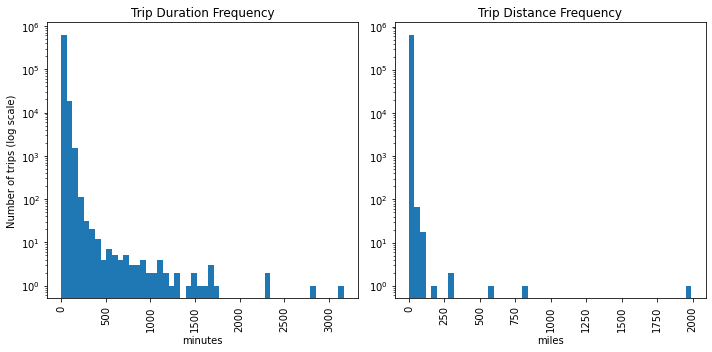

In [65]:
import matplotlib.pyplot as plt

print('Before removing outliers:')

# Describe showed some negative and very high values for Trip Distance and Trip Duration.
# Use histograms to show how the values are distributed.

plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.hist(df123['TripDuration'], bins=50, log=True)
plt.ylabel('Number of trips (log scale)')
plt.xlabel('minutes')
plt.title('Trip Duration Frequency')
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.hist(df123['TripDistance'], bins=50, log=True)
plt.xlabel('miles')
plt.title('Trip Distance Frequency')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()
plt.close()


In [66]:
# Describe showed negative trip duration values. Remove these entries
df123 = df123[df123['TripDuration'] > 0]

# Get number of rows dropped
rows_remaining = df123.shape[0]
neg_dur_rows_dropped = rows_remaining - df123.shape[0]
print('Negative duration dropped: ' + str(neg_dur_rows_dropped))

# Drop > a certain number of hours
time_thresh = 720 #720 minutes (i.e. 12 hours)
rows_remaining = df123.shape[0]
df123 = df123[df123['TripDuration'] < time_thresh]
high_dur_rows_dropped = rows_remaining - df123.shape[0]

print('Over ' + str(time_thresh/60) + ' hours dropped: ' + str(high_dur_rows_dropped))

# Describe showed negative trip distance values. Remove these entries, and trips of 0 miles.
rows_remaining = df123.shape[0]
df123 = df123[df123['TripDistance'] > 0]
neg_dist_rows_dropped = rows_remaining - df123.shape[0]
print('Negative or 0 distance dropped: ' + str(neg_dist_rows_dropped))

# Remove entries over a certain amount for trip distance.  Maximum range is currently around 25 miles.
dist_thresh = 25 #maximum no. of miles a dockless scooter in Louisville can travel on a full single charge.
rows_remaining = df123.shape[0]
df123 = df123[df123['TripDistance'] < dist_thresh]
high_dist_rows_dropped = rows_remaining - df123.shape[0]
print('Distance > ' + str(dist_thresh) + ' mi dropped: ' + str(high_dist_rows_dropped))

Negative duration dropped: 0
Over 12.0 hours dropped: 38
Negative or 0 distance dropped: 85085
Distance > 25 mi dropped: 130


After removing outliers:


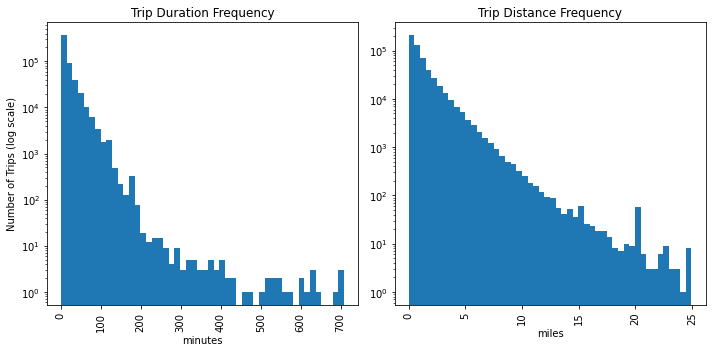

In [67]:
print('After removing outliers:')
plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.hist(df123['TripDuration'], bins=50, log=True)
plt.ylabel('Number of Trips (log scale)')
plt.xlabel('minutes')
plt.title('Trip Duration Frequency')
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.hist(df123['TripDistance'], bins=50, log=True)
plt.xlabel('miles')
plt.title('Trip Distance Frequency')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()
plt.close()

In [68]:
df123[df123['TripDuration'] > 400].count()
#df123[df123['TripDistance'] > 25].count()

TripID            28
StartDate         28
TripDuration      28
TripDistance      28
StartLatitude     28
StartLongitude    28
EndLatitude       28
EndLongitude      28
DayOfWeek         28
HourNum           28
Precip.(inch)     28
Snow(inch)        28
AvgTemp           28
dtype: int64

In [69]:
# print number of rows dropped
print('Total entries remaining: ' + str(rows_remaining))
print('Percent removed: ' + str(((total_rows - rows_remaining)/total_rows)*100.00) + '%')

Total entries remaining: 544327
Percent removed: 15.111255972951728%


In [70]:
# Print the data types to show each column is the correct type.
print('Column Data types:')
print(df123.dtypes)

Column Data types:
TripID             object
StartDate          object
TripDuration        int64
TripDistance      float64
StartLatitude     float64
StartLongitude    float64
EndLatitude       float64
EndLongitude      float64
DayOfWeek           int64
HourNum             int64
Precip.(inch)     float64
Snow(inch)        float64
AvgTemp           float64
dtype: object


# Exploratory Data Analysis (EDA)

In [71]:
df123.describe()

,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum,Precip.(inch),Snow(inch),AvgTemp
count,544197.000000,544197.000000,544197.000000,544197.000000,544197.000000,544197.000000,544197.000000,544197.000000,544197.000000,544197.000000,544197.000000
mean,16.512985,1.191079,38.240833,-85.747974,38.239915,-85.746705,4.272936,14.488119,0.510416,0.049343,67.078618
std,20.367526,1.473760,0.040721,0.200803,0.170772,0.476571,2.082394,4.611343,0.949366,0.326683,15.143048
min,1.000000,0.001000,25.778000,-122.652000,0.000000,-122.675000,1.000000,0.000000,0.000000,0.000000,12.650000
25%,5.000000,0.310000,38.222000,-85.759000,38.222000,-85.759000,2.000000,11.000000,0.000000,0.000000,56.650000
50%,9.000000,0.708000,38.250000,-85.754000,38.249000,-85.754000,4.000000,15.000000,0.000000,0.000000,72.050000
75%,20.000000,1.494000,38.256000,-85.741000,38.256000,-85.740000,6.000000,18.000000,0.550000,0.000000,79.350000
max,708.000000,24.950000,50.108000,8.677000,50.117000,8.681000,7.000000,24.000000,5.280000,4.490000,88.100000


In [72]:
from pandas.plotting import scatter_matrix

#plt.xkcd()
#scatter_matrix(df123a.loc[:, 'AvgTemp':'TripDuration'], alpha=0.2, figsize=(15, 15), diagonal='kde')
#plt.show()
'''
plt.xkcd()
scatter_matrix(df123.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 12]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show() '''

"\nplt.xkcd()\nscatter_matrix(df123.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 12]], alpha=0.2, figsize=(15, 15), diagonal='kde')\nplt.show() "

In [73]:
import seaborn as sns
#sns.set(palette='Blues_r')
#df123.loc[:,'DayOfWeek'].hist(bins=7, figsize=(10,7)).set_title('Rides During the Week')
# These are the colors that will be used in the plot
sns.set_palette("tab10",plt.cm.tab10.N )

## How long (time or distance) are dockless vehicles used?

Data cleaning removed many of the outliers of the data, but it's still difficult to see trends by observing all of the data at once. If we 'zoom in' to the bulk of the data, more trends in duration and distance can be observed.


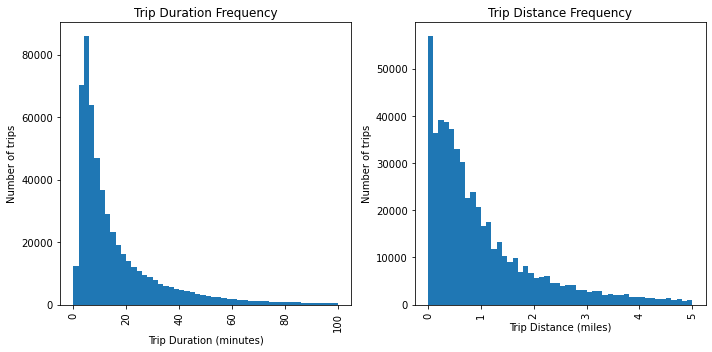

In [74]:
# Plot the histograms from above, with limits on the range
plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.hist(df123['TripDuration'], bins=50, range=(0, 100))
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Number of trips')
plt.title('Trip Duration Frequency')
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.hist(df123['TripDistance'], bins=50, range=(0, 5))
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Number of trips')
plt.title('Trip Distance Frequency')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()
plt.close()

Peaks that were otherwise hidden now reveal themselves. The most rides appear to be be between 2-20 minutes and 0.2 - 2 miles. There's also a surprising peak just above 0.1 mile.

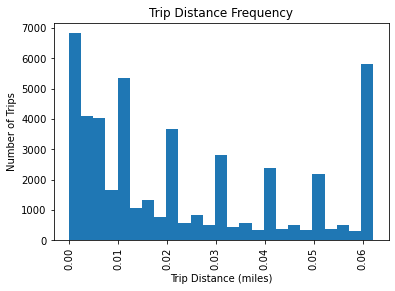

In [75]:
# Plot the 0-100 meters to see if there are any trends within the peak
plt.hist(df123['TripDistance'], bins=25, range=(0, 0.0621371)) # 100 meters = 0.0621371 miles
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Number of Trips')
plt.title('Trip Distance Frequency')
plt.xticks(rotation='vertical')

plt.show()
plt.close()

The plot from 0-100 meters reveals a few regularly placed peaks. These peaks likely result from different rounding practices from the vendors providing data.

## How many Coordinates are in the data?

This project will use Geo Coordinates such as the Latitude and Longitude as a component of the predicted result (i.e. How many dockless vehicles should be placed in a certain location at a certain point in time?). It will be helpful to understand how many unique Coordinates exist.

In [76]:
import censusgeocode as cg 
'''
result1 = cg.coordinates(x=df123['StartLongitude'].iloc[1], y=df123['StartLatitude'].iloc[1]) 
result2 = cg.coordinates(x=df123['EndLongitude'].iloc[1], y=df123['EndLatitude'].iloc[1])
'''
#I have to retrieve census Tract or Census geocode data from longitude and latitude information so I can continue my analysis

"\nresult1 = cg.coordinates(x=df123['StartLongitude'].iloc[1], y=df123['StartLatitude'].iloc[1]) \nresult2 = cg.coordinates(x=df123['EndLongitude'].iloc[1], y=df123['EndLatitude'].iloc[1])\n"

In [77]:
#result1['Census Tracts'][0]['GEOID']

In [78]:
df123.reset_index(drop=True, inplace=True)

In [79]:
'''
CensusTractStart = []
CensusTractEnd = []

for i in range(544196):
    
    coord1 = cg.coordinates(x=df123['StartLongitude'].iloc[i], y=df123['StartLatitude'].iloc[i]) 
    coord1result = int(coord1['Census Tracts'][0]['GEOID'])
    CensusTractStart.append(coord1result)
    
    coord2 = cg.coordinates(x=df123['EndLongitude'].iloc[i], y=df123['EndLatitude'].iloc[i])
    coord2result = int(coord2['Census Tracts'][0]['GEOID'])
    CensusTractEnd.append(coord2result)
        
print(len(CensusTractStart))
print(len(CensusTractEnd))
'''

"\nCensusTractStart = []\nCensusTractEnd = []\n\nfor i in range(544196):\n    \n    coord1 = cg.coordinates(x=df123['StartLongitude'].iloc[i], y=df123['StartLatitude'].iloc[i]) \n    coord1result = int(coord1['Census Tracts'][0]['GEOID'])\n    CensusTractStart.append(coord1result)\n    \n    coord2 = cg.coordinates(x=df123['EndLongitude'].iloc[i], y=df123['EndLatitude'].iloc[i])\n    coord2result = int(coord2['Census Tracts'][0]['GEOID'])\n    CensusTractEnd.append(coord2result)\n        \nprint(len(CensusTractStart))\nprint(len(CensusTractEnd))\n"

More documentation here: https://pypi.org/project/censusgeocode/ 

https://stackoverflow.com/questions/64983035/how-to-find-census-tract-from-latitude-and-longitude-in-python

In [80]:
#Combining Latitude and Longitude coordinates into one column
df123['StartCoords'] = list(zip(df123['StartLatitude'], df123['StartLongitude']))
df123['EndCoords'] = list(zip(df123['EndLatitude'], df123['EndLongitude']))

In [81]:
# Use sets to find unique values for each
print('Number of Coordinate Starts: ' + str(len(set(df123['StartCoords']))))
print('Number of Coordinate Ends: ' + str(len(set(df123['EndCoords']))))

# Save the unique set of census tracts as a CSV. This will be modified in step 11.
unique_coords = pd.DataFrame(set(df123['StartCoords'].append(df123['EndCoords'])))
# unique_cts.to_csv('unique_census_tracts.csv')

# Print number of unique CTs
print('Number of unique Coordinates in the data: ' + str(len(unique_coords)))


Number of Coordinate Starts: 10898
Number of Coordinate Ends: 12267
Number of unique Coordinates in the data: 14370


The differences between these 3 values indicates that there are census tracts that have only trip starts or only trip ends.

## Which Coordinates have the most traffic?

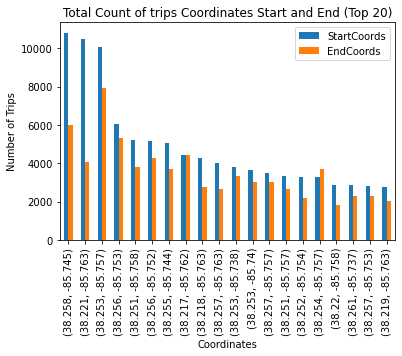

In [82]:
# Count how many trips started in each Coordinate
coordinates_starts = pd.DataFrame(df123['StartCoords'].value_counts())

# Count how many trips ended in each Coordinate
coordinates_ends = pd.DataFrame(df123['EndCoords'].value_counts())

# Join start and end counts and plot the top 20. Value counts sorts descending, inner join preserves Coordinate's sorting.
coordinates_comp = coordinates_starts.join(coordinates_ends, how='inner')
coordinates_comp.head(20).plot(kind='bar')
plt.title('Total Count of trips Coordinates Start and End (Top 20)')
plt.xlabel('Coordinates')
plt.ylabel('Number of Trips')

plt.show()
plt.close()

## Geospatial Analysis

## Load Packages

In [83]:
import geopandas as gpd # for working on geodata
from shapely.geometry import Point

## Load Data

### Shapefile

In [84]:
shapefile = gpd.read_file(r'C:\Users\abhir\OneDrive\Documents\GitHub\TripDataAnalysis-CityOfLouisville-DocklessVehicles\shapefiles\louisville.shp')

In [85]:
shapefile.rename(columns = {'marketCTs_': 'NH'}, inplace = True)

In [86]:
shapefile.head()

,NH,Id,geometry
0,Airport,13,"POLYGON ((-85.72897 38.19008, -85.72813 38.189..."
1,Central Bardstown,15,"POLYGON ((-85.64922 38.22133, -85.64625 38.221..."
2,Central Preston,14,"POLYGON ((-85.68237 38.16812, -85.68174 38.167..."
3,Central Taylorsville,16,"POLYGON ((-85.60988 38.23319, -85.60437 38.231..."
4,Downtown,1,"POLYGON ((-85.74865 38.26737, -85.74829 38.267..."


In [87]:
shapefile.geometry.name

'geometry'

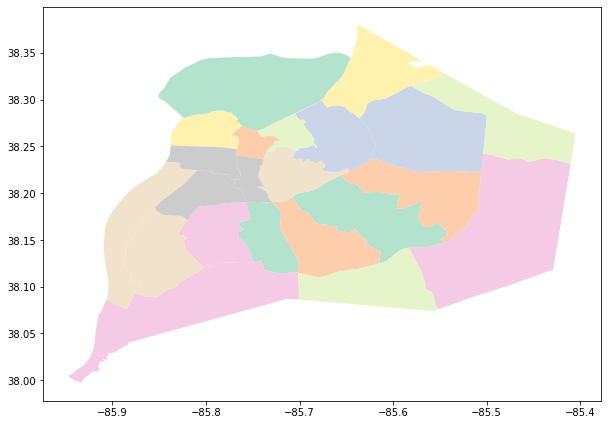

In [88]:
# define figure and ax(es):

fig, ax1 = plt.subplots(1,1, figsize = (10, 10))

shapefile.plot(column = 'NH',
         cmap = 'Pastel2',
         ax = ax1)

plt.show()

In [89]:
# check if crs is EPSG:4326
shapefile = shapefile.set_crs('EPSG:4326')
format(shapefile.crs)

'EPSG:4326'

EPSG:4326
WGS 84 -- WGS84 - World Geodetic System 1984, used in GPS

4326 is just the EPSG identifier of WGS84.

WGS84 comprises a standard coordinate frame for the Earth, a datum/reference ellipsoid for raw altitude data

In [90]:
df123.head()

,TripID,StartDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum,Precip.(inch),Snow(inch),AvgTemp,StartCoords,EndCoords
0,00312fae-c855-eddf-c8e0-98655355,2019-06-26,4,0.240,38.215,-85.758,38.215,-85.751,4,14,0.0,0.0,80.05,"(38.215, -85.758)","(38.215, -85.751)"
1,00363782-6876-6801-74c9-aa310713,2019-06-26,21,0.880,38.257,-85.763,38.256,-85.746,4,13,0.0,0.0,80.05,"(38.257, -85.763)","(38.256, -85.746)"
2,00530ce5-ce5b-660c-807f-dc01f27d,2019-06-26,3,0.500,38.262,-85.744,38.258,-85.742,4,15,0.0,0.0,80.05,"(38.262, -85.744)","(38.258, -85.742)"
3,005a612f-8216-ecb1-cdf9-fda3f8fd,2019-06-26,21,0.736,38.253,-85.751,38.249,-85.757,4,13,0.0,0.0,80.05,"(38.253, -85.751)","(38.249, -85.757)"
4,0095552f-3567-c170-35b3-f04554c8,2019-06-26,3,0.080,38.257,-85.748,38.257,-85.746,4,16,0.0,0.0,80.05,"(38.257, -85.748)","(38.257, -85.746)"


In [91]:
df123['StartCoords'][0][0]

38.215

## Split Trips in Three

In this way we create three datasets with a common key, TripID, and we will merge them at the end.

### Trip Duration and Distance

In [92]:
trips_dd = df123[['TripID', 'TripDuration', 'TripDistance', 'DayOfWeek']]

In [93]:
trips_dd.head()

,TripID,TripDuration,TripDistance,DayOfWeek
0,00312fae-c855-eddf-c8e0-98655355,4,0.240,4
1,00363782-6876-6801-74c9-aa310713,21,0.880,4
2,00530ce5-ce5b-660c-807f-dc01f27d,3,0.500,4
3,005a612f-8216-ecb1-cdf9-fda3f8fd,21,0.736,4
4,0095552f-3567-c170-35b3-f04554c8,3,0.080,4


### Start DataFrame

Select the subsection of the original dataframe we are intersted in:

In [94]:
start_cols = [col for col in df123.columns if ('Start' in col or 'TripID' in col)]

In [95]:
trips_start = df123[start_cols]
trips_start.head()

,TripID,StartDate,StartLatitude,StartLongitude,StartCoords
0,00312fae-c855-eddf-c8e0-98655355,2019-06-26,38.215,-85.758,"(38.215, -85.758)"
1,00363782-6876-6801-74c9-aa310713,2019-06-26,38.257,-85.763,"(38.257, -85.763)"
2,00530ce5-ce5b-660c-807f-dc01f27d,2019-06-26,38.262,-85.744,"(38.262, -85.744)"
3,005a612f-8216-ecb1-cdf9-fda3f8fd,2019-06-26,38.253,-85.751,"(38.253, -85.751)"
4,0095552f-3567-c170-35b3-f04554c8,2019-06-26,38.257,-85.748,"(38.257, -85.748)"


And turn it into a GeoDataFrame, specifying its geometry. More documentation on how to turn a DataFrame into a GeoDataFrame is here: https://geopandas.org/gallery/create_geopandas_from_pandas.html

In [96]:
gdf_start = gpd.GeoDataFrame(trips_start,
                             geometry=gpd.points_from_xy(df123.StartLongitude, df123.StartLatitude),
                             crs = 'EPSG:4326')
gdf_start.head()

,TripID,StartDate,StartLatitude,StartLongitude,StartCoords,geometry
0,00312fae-c855-eddf-c8e0-98655355,2019-06-26,38.215,-85.758,"(38.215, -85.758)",POINT (-85.75800 38.21500)
1,00363782-6876-6801-74c9-aa310713,2019-06-26,38.257,-85.763,"(38.257, -85.763)",POINT (-85.76300 38.25700)
2,00530ce5-ce5b-660c-807f-dc01f27d,2019-06-26,38.262,-85.744,"(38.262, -85.744)",POINT (-85.74400 38.26200)
3,005a612f-8216-ecb1-cdf9-fda3f8fd,2019-06-26,38.253,-85.751,"(38.253, -85.751)",POINT (-85.75100 38.25300)
4,0095552f-3567-c170-35b3-f04554c8,2019-06-26,38.257,-85.748,"(38.257, -85.748)",POINT (-85.74800 38.25700)


### End DataFrame

Select the subsection of the original dataframe we are intersted in:

In [97]:
end_cols = [col for col in df123.columns if ('End' in col or 'TripID' in col)]

In [98]:
trips_end = df123[end_cols]
trips_end.head()

,TripID,EndLatitude,EndLongitude,EndCoords
0,00312fae-c855-eddf-c8e0-98655355,38.215,-85.751,"(38.215, -85.751)"
1,00363782-6876-6801-74c9-aa310713,38.256,-85.746,"(38.256, -85.746)"
2,00530ce5-ce5b-660c-807f-dc01f27d,38.258,-85.742,"(38.258, -85.742)"
3,005a612f-8216-ecb1-cdf9-fda3f8fd,38.249,-85.757,"(38.249, -85.757)"
4,0095552f-3567-c170-35b3-f04554c8,38.257,-85.746,"(38.257, -85.746)"


And turn it into a GeoDataFrame, specifying its geometry.

In [99]:
gdf_end =gpd.GeoDataFrame(trips_end,
                          geometry = gpd.points_from_xy(trips_end.EndLongitude, trips_end.EndLatitude),
                          crs = 'EPSG:4326')

In [100]:
gdf_end.head()

,TripID,EndLatitude,EndLongitude,EndCoords,geometry
0,00312fae-c855-eddf-c8e0-98655355,38.215,-85.751,"(38.215, -85.751)",POINT (-85.75100 38.21500)
1,00363782-6876-6801-74c9-aa310713,38.256,-85.746,"(38.256, -85.746)",POINT (-85.74600 38.25600)
2,00530ce5-ce5b-660c-807f-dc01f27d,38.258,-85.742,"(38.258, -85.742)",POINT (-85.74200 38.25800)
3,005a612f-8216-ecb1-cdf9-fda3f8fd,38.249,-85.757,"(38.249, -85.757)",POINT (-85.75700 38.24900)
4,0095552f-3567-c170-35b3-f04554c8,38.257,-85.746,"(38.257, -85.746)",POINT (-85.74600 38.25700)


## Intersect GDF and Shapefile

In [101]:
print(
    'Start CRS is {} its geometry is `{}`.\n'.format(gdf_start.crs, gdf_start.geometry.name) +
    'End CRS is {}, its geometry is `{}`.\n'.format(gdf_end.crs, gdf_end.geometry.name) +
    'Shapefile CRS is {}.'.format(shapefile.crs)
)

Start CRS is EPSG:4326 its geometry is `geometry`.
End CRS is EPSG:4326, its geometry is `geometry`.
Shapefile CRS is EPSG:4326.


### Intersect Starting Points

In [102]:
start_nh = gpd.overlay(gdf_start, shapefile, how = 'intersection')

In [103]:
start_nh.rename(columns = {'NH': 'StartNH'}, inplace = True)

In [104]:
start_nh.head()

,TripID,StartDate,StartLatitude,StartLongitude,StartCoords,StartNH,Id,geometry
0,00312fae-c855-eddf-c8e0-98655355,2019-06-26,38.215,-85.758,"(38.215, -85.758)",University,7,POINT (-85.75800 38.21500)
1,011dc361-9ddc-9236-8f21-65a00a52,2019-06-26,38.212,-85.756,"(38.212, -85.756)",University,7,POINT (-85.75600 38.21200)
2,0243e668-7a0f-9a0a-c50d-f40c53e6,2019-06-26,38.238,-85.754,"(38.238, -85.754)",University,7,POINT (-85.75400 38.23800)
3,0589d16b-a007-8b4e-2003-ad5247e2,2019-06-26,38.226,-85.760,"(38.226, -85.76)",University,7,POINT (-85.76000 38.22600)
4,070e3bf7-1e22-cb1e-b4ab-49b5b32c,2019-06-26,38.211,-85.766,"(38.211, -85.766)",University,7,POINT (-85.76600 38.21100)


### Intersect End Points

In [105]:
end_nh = gpd.overlay(gdf_end, shapefile, how = 'intersection')

In [106]:
end_nh.rename(columns = {'NH': 'EndNH'}, inplace = True)

In [107]:
end_nh.head()

,TripID,EndLatitude,EndLongitude,EndCoords,EndNH,Id,geometry
0,00312fae-c855-eddf-c8e0-98655355,38.215,-85.751,"(38.215, -85.751)",University,7,POINT (-85.75100 38.21500)
1,011dc361-9ddc-9236-8f21-65a00a52,38.204,-85.759,"(38.204, -85.759)",University,7,POINT (-85.75900 38.20400)
2,03aa533f-1f84-5a0e-c724-22aca4b8,38.213,-85.752,"(38.213, -85.752)",University,7,POINT (-85.75200 38.21300)
3,070e3bf7-1e22-cb1e-b4ab-49b5b32c,38.210,-85.766,"(38.21, -85.766)",University,7,POINT (-85.76600 38.21000)
4,0791928f-b6cd-b210-cb8b-ac8d2dea,38.217,-85.761,"(38.217, -85.761)",University,7,POINT (-85.76100 38.21700)


## Merge the two splits to create the final dataset

In [108]:
start_nh.drop(['Id', 'geometry'], inplace = True, axis = 1)

In [109]:
end_nh.drop(['Id', 'geometry'], inplace = True, axis = 1)

In [110]:
gdf = trips_dd.merge(start_nh, on = 'TripID').merge(end_nh)

In [111]:
gdf.drop(['StartCoords', 'EndCoords'], inplace = True, axis = 1)

In [112]:
gdf.head()

,TripID,TripDuration,TripDistance,DayOfWeek,StartDate,StartLatitude,StartLongitude,StartNH,EndLatitude,EndLongitude,EndNH
0,00312fae-c855-eddf-c8e0-98655355,4,0.240,4,2019-06-26,38.215,-85.758,University,38.215,-85.751,University
1,00363782-6876-6801-74c9-aa310713,21,0.880,4,2019-06-26,38.257,-85.763,Downtown,38.256,-85.746,Downtown
2,00530ce5-ce5b-660c-807f-dc01f27d,3,0.500,4,2019-06-26,38.262,-85.744,Downtown,38.258,-85.742,Downtown
3,005a612f-8216-ecb1-cdf9-fda3f8fd,21,0.736,4,2019-06-26,38.253,-85.751,Downtown,38.249,-85.757,Downtown
4,0095552f-3567-c170-35b3-f04554c8,3,0.080,4,2019-06-26,38.257,-85.748,Downtown,38.257,-85.746,Downtown


## Which Neighborhoods have the most traffic?

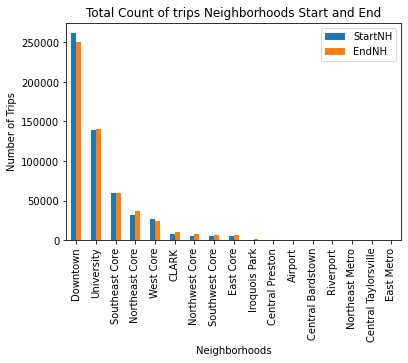

In [113]:
# Count how many trips started in each Coordinate
nh_starts = pd.DataFrame(gdf['StartNH'].value_counts())

# Count how many trips ended in each Coordinate
nh_ends = pd.DataFrame(gdf['EndNH'].value_counts())

# Join start and end counts and plot the top 20. Value counts sorts descending, inner join preserves Coordinate's sorting.
nh_comp = nh_starts.join(nh_ends, how='inner')
nh_comp.head(17).plot(kind='bar')
plt.title('Total Count of trips Neighborhoods Start and End')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Trips')

plt.show()
plt.close()

In [113]:
print(start_nh.shape, end_nh.shape, gdf.shape)

(544171, 6) (544108, 5) (544099, 11)


Note: the shapes differ, but that is because some trips start in the boundaries and end outside.

## Plotting Trips

C:\Users\abhir\Anaconda3\lib\site-packages\geopandas\plotting.py:933: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.draw()
C:\Users\abhir\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


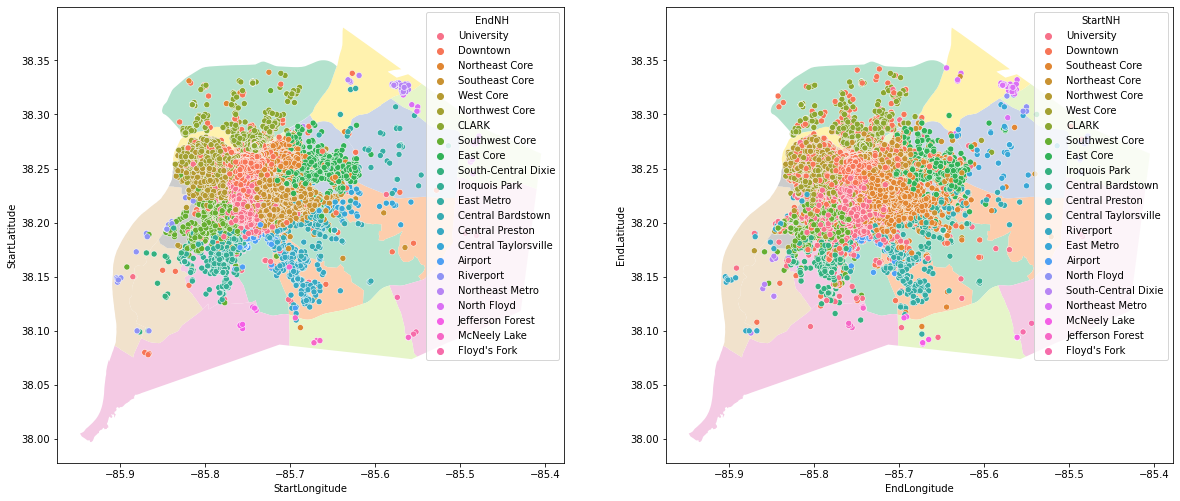

In [114]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 20))

shapefile.plot(ax = ax1,
           column = 'NH',
           cmap = 'Pastel2')

sns.scatterplot(data = gdf,
                x = 'StartLongitude',
                y = 'StartLatitude',
                hue = 'EndNH',
                ax = ax1)

shapefile.plot(ax = ax2,
          column = 'NH',
          cmap = 'Pastel2')

sns.scatterplot(data = gdf,
                x = 'EndLongitude',
                y = 'EndLatitude',
                hue = 'StartNH',
                ax = ax2)

plt.show()

## Which days have the most traffic?

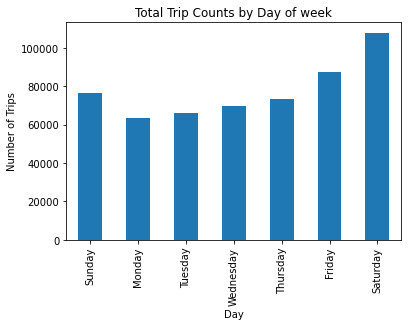

In [115]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(df123['DayOfWeek'].value_counts().sort_index())

# Map day of week for better labels. Data documentation indicates "0=Sunday and so on.""
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_total['Day'] = days

# Plot
daily_total.plot(kind='bar', x='Day', y='DayOfWeek', title='Total Trip Counts by Day of week', legend=False)
plt.ylabel('Number of Trips')
plt.show()
plt.close()

We see that general ridership bottomed out during the week, and increases into the weekend. Next, we'll explore whether this trend is different for different location coordinates.

## Does location affect day of week traffic differently?

To determine if different location have a different ridership pattern, we start with the top 4 locations.

In [116]:
print(gdf['StartNH'].value_counts().head(4))

Downtown          261909
University        139424
Southeast Core     59245
Northeast Core     32203
Name: StartNH, dtype: int64


In [117]:
print(gdf['EndNH'].value_counts().head(4))

Downtown          250784
University        140377
Southeast Core     59227
Northeast Core     36630
Name: EndNH, dtype: int64


Top 4 starting location counts by day:


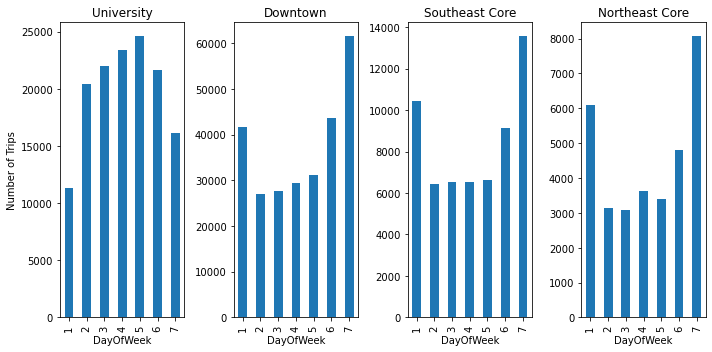

Top 4 ending location counts by day:


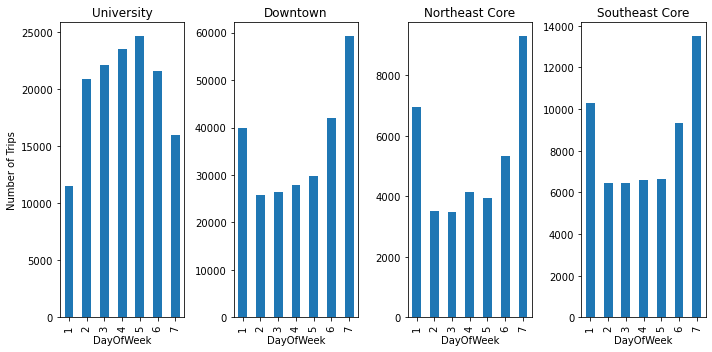

In [118]:
# Count start location by day:
weekday_start = gdf.groupby(by=['DayOfWeek', 'StartNH']).count()

# Because the NAs are removed, the count value will be consistent throughout.  So arbitrarily use the TripID column.
weekday_start_pivot = pd.pivot_table(weekday_start, index='StartNH', values='TripID', columns='DayOfWeek')

# Create plots to compare the top 4 starting locations
print('Top 4 starting location counts by day:')
plt.figure(figsize=[10, 5])

# Plot separately because the intent is to compare day to day and trends, not absolute ridership between locations
plt.subplot(1,4,1)
weekday_start_pivot.loc['University'].plot(kind='bar')
plt.title('University')
plt.ylabel('Number of Trips')

plt.subplot(1,4,2)
weekday_start_pivot.loc['Downtown'].plot(kind='bar')
plt.title('Downtown')

plt.subplot(1,4,3)
weekday_start_pivot.loc['Southeast Core'].plot(kind='bar')
plt.title('Southeast Core')

plt.subplot(1,4,4)
weekday_start_pivot.loc['Northeast Core'].plot(kind='bar')
plt.title('Northeast Core')

plt.tight_layout()
plt.show()
plt.close()

# Now do the same for ending locations:
# Count end location by day:
weekday_end = gdf.groupby(by=['DayOfWeek', 'EndNH']).count()

# Because the NAs are removed, the count value will be consistent throughout each column.  So arbitrarily use the TripID column.
weekday_end_pivot = pd.pivot_table(weekday_end, index='EndNH', values='TripID', columns='DayOfWeek')

# Create plots to compare the top 4 ending locations
print('Top 4 ending location counts by day:')
plt.figure(figsize=[10, 5])

# Plot separately because the intent is to compare day to day and trends, not absolute ridership between locations
plt.subplot(1,4,1)
weekday_end_pivot.loc['University'].plot(kind='bar')
plt.title('University')
plt.ylabel('Number of Trips')

plt.subplot(1,4,2)
weekday_end_pivot.loc['Downtown'].plot(kind='bar')
plt.title('Downtown')

plt.subplot(1,4,3)
weekday_end_pivot.loc['Northeast Core'].plot(kind='bar')
plt.title('Northeast Core')

plt.subplot(1,4,4)
weekday_end_pivot.loc['Southeast Core'].plot(kind='bar')
plt.title('Southeast Core')

plt.tight_layout()
plt.show()
plt.close()

In University, weekday usage nearly doubles weekend usage. In Downtown, Northeast Core and Southeast Core, the opposite is true. This suggests that riders in University are commuting and riders in Downtown, Northeast Core and Southeast Core locations are riding to weekend activities. Some areas have more activity on weekends, others have more activity in the middle of the week. This supports the hypothesis that day of week can be used to predict optimal dockless vehicle placements.

The ending locations appear to track with the starting locations. Do most trips start and end in the same location?


## How many trips start and end in different locations?

In [119]:
gdf_start.rename(columns={'geometry': 'GeometryStart'}, inplace=True)
gdf_end.rename(columns={'geometry': 'GeometryEnd'}, inplace=True)

In [120]:
scooters = trips_dd.merge(gdf_start, on = 'TripID').merge(gdf_end)

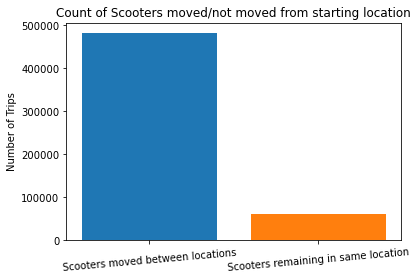

In [121]:
# Find entries where geo location Start and End are not equal
moved_scooters = scooters[scooters['GeometryStart'] != scooters['GeometryEnd']]
moved = moved_scooters.shape[0]

# Find entries where geo location Start and End are equal
stationary_scooters = scooters[scooters['GeometryStart'] == scooters['GeometryEnd']]
stationary = stationary_scooters.shape[0]

# Plot the results in a bar plot:
plt.bar('Scooters moved between locations', moved)
plt.bar('Scooters remaining in same location', stationary)
plt.title('Count of Scooters moved/not moved from starting location')
plt.ylabel('Number of Trips')
plt.xticks(rotation=5)
plt.show()
plt.close()

As it turns out, more scooters are moved between locations than remaining in their original locations. The synchronization seen in step 6 suggests that those locations experience an even trade between scooters removed and added.

## How many trips start and end in different neighborhoods(NH)?

Example: A Trip might start in the University neighborhood and end in Northeast core neighborhood. 

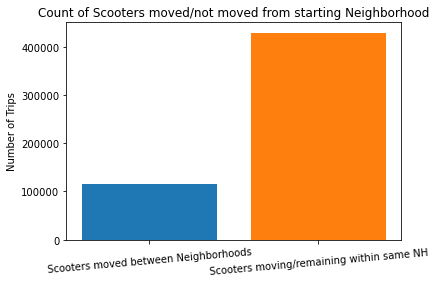

In [122]:
# Find entries where Neighbourhood Start and End are not equal
moved_scooters_r = gdf[gdf['StartNH'] != gdf['EndNH']]
moved_r = moved_scooters_r.shape[0]

# Find entries where NH Start and End are equal
stationary_scooters_r = gdf[gdf['StartNH'] == gdf['EndNH']]
stationary_r = stationary_scooters_r.shape[0]

# Plot the results in a bar plot:
plt.bar('Scooters moved between Neighborhoods', moved_r)
plt.bar('Scooters moving/remaining within same NH', stationary_r)
plt.title('Count of Scooters moved/not moved from starting Neighborhood')
plt.ylabel('Number of Trips')
plt.xticks(rotation=5)
plt.show()
plt.close()

Hence, more scooters are moved within the same neighborhoods than moving from one neighborhood to another.

## Are certain months more popular than others?

In [123]:
pd.DatetimeIndex(scooters['StartDate']).month.value_counts().sort_index()

1     15157
2     15580
3     21814
4     32077
5     54327
6     51942
7     63484
8     76303
9     78304
10    73874
11    40366
12    20969
Name: StartDate, dtype: int64

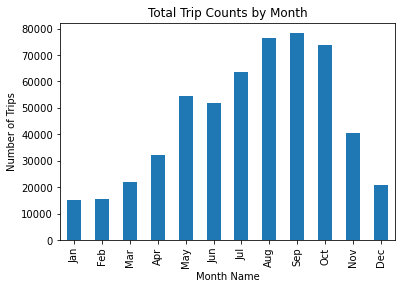

In [124]:
# Count trips per day and sort by day:
monthly_total = pd.DataFrame(pd.DatetimeIndex(scooters['StartDate']).month.value_counts().sort_index())

# Map month names for better labels.
monthly_total['Month Name'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
monthly_total.plot(kind='bar', x='Month Name', y='StartDate', title='Total Trip Counts by Month', legend=False)
plt.ylabel('Number of Trips')
plt.show()
plt.close()

There appears to be more ridership in the warm summer months through mid fall, with peak usage in July through October. However, the data only begins in early 2018, and, as we'll see in the next section, scooter popularity has increased over the last year.

## How has ridership changed over time?

In [125]:
scooters1 = scooters

In [126]:
scooters1['Date'] = pd.DatetimeIndex(scooters1['StartDate'])

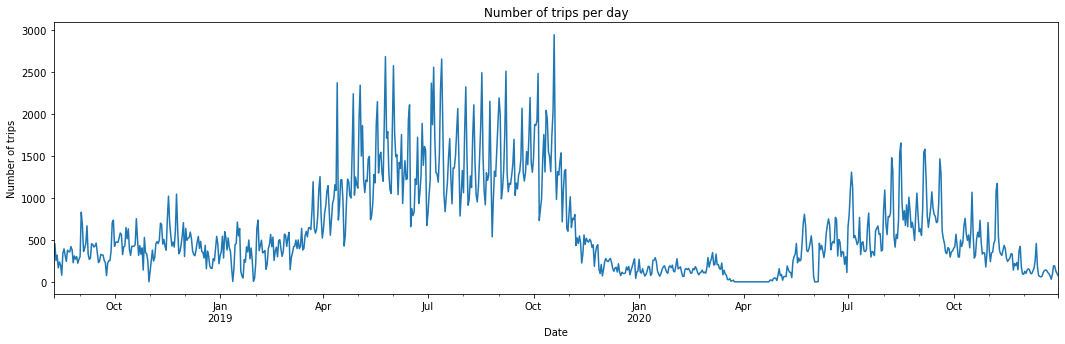

In [127]:
# Aggregate counts by day
trips_per_day = scooters1.resample('D', on='Date').count()

# Plot results (once again, arbitrarily using TripID because using the count method)
plt.figure(figsize=[18, 5])
trips_per_day['TripID'].plot()
plt.title('Number of trips per day')
plt.ylabel('Number of trips')
plt.show()
plt.close()

In [128]:
scooters1['Date'].value_counts()

2019-10-19    2943
2019-05-25    2683
2019-07-13    2654
2019-06-01    2574
2019-07-06    2556
              ... 
2020-04-26      11
2019-01-30       7
2020-03-21       6
2019-01-12       4
2020-06-05       2
Name: Date, Length: 841, dtype: int64

In mid-October of 2019, there is a peak that coincides with Louisville's HalloScream, Jack-O-Lantern and Haunted Park after Dark geocatching halloween events. The regularly spaced spikes in the data appear to fall on weekends. The graph also shows a drastic decrease in March/April 2020 as scooters lost popularity accross the US due to increasing Covid cases during the early pandemic days.

## How does time of day affect ridership?

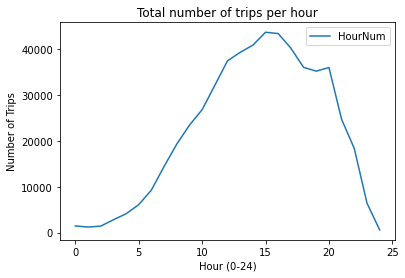

In [129]:
# Aggregate total counts by hour
trips_per_hour = pd.DataFrame(df123['HourNum'].value_counts().sort_index())

# Plot results (once again, arbitrarily using TripID)
trips_per_hour.plot()
plt.title('Total number of trips per hour')
plt.xlabel('Hour (0-24)')
plt.ylabel('Number of Trips')
plt.show()
plt.close()

The majority of trips appear to occur between 10:00 AM and 7:00 PM, with a peak in the late afternoon. This might vary by day/location.

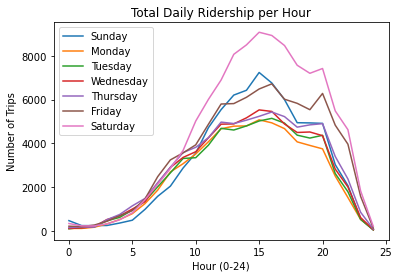

In [130]:
# Create a DataFrame grouped by Hour and day of week
Trips_hour_day = df123.groupby(by=['HourNum', 'DayOfWeek']).count()

# Create a pivot table with the days of the week as columns. Use the Device ID to maintain the count.
Trips_hour_day = Trips_hour_day.reset_index().pivot(index='HourNum', columns='DayOfWeek', values='TripID')

# Rename the columns to the verbal days of the week
Trips_hour_day.columns = days

# Plot the result
Trips_hour_day.plot()

plt.title('Total Daily Ridership per Hour')
plt.xlabel('Hour (0-24)')
plt.ylabel('Number of Trips')
plt.show()
plt.close()

For each weekday, there are consistent local maxima around normal commute times: 09:00 and 16:00, with the afternoon commute appearing more popular. Then, there is a peak around noon, perhaps reflecting quick lunch trips. On weekend days, the graphs are much smoother, with Saturdays, Sundays peak at 15:00 and Friday's at 16:00.

In [131]:
gdf['HourNum'] = df123['HourNum']

In [132]:
pd.DataFrame(gdf['StartNH'].value_counts().head()).index

Index(['Downtown', 'University', 'Southeast Core', 'Northeast Core',
       'West Core'],
      dtype='object')

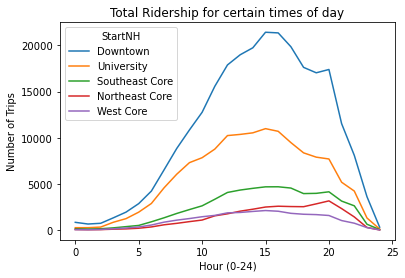

In [133]:
# Create a DataFrame grouped by Hour and neighborhood
scoots_hour_cts = gdf.groupby(by=['HourNum', 'StartNH']).count()

# Create a pivot table with the days of the week as columns. Use the TripID to maintain the count.
scoots_hour_cts = scoots_hour_cts.reset_index().pivot(index='HourNum', columns='StartNH', values='TripID')

# Plot the result for the top 5 census tracts
scoots_hour_cts[list(pd.DataFrame(gdf['StartNH'].value_counts().head()).index)].plot()

plt.title('Total Ridership for certain times of day')
plt.xlabel('Hour (0-24)')
plt.ylabel('Number of Trips')
plt.show()
plt.close()

The top 5 neighborhoods appear to have different peak times. This further supports the hypothesis that time of day can be used to optimize scooter placement.

## EDA Conclusion

The data shows that location, date, week, and time of day have a significant impact on the ridership numbers. These variables appear to be great options for creating a model to predict scooter ridership in an area.

# Machine Learning Analysis

## Prepare data for prediction

The function below was created to generate the number of rides in a neighborhood per hour. Then the date columns can be used as features, and the number of rides as target.


## Feature Engineering

In [134]:
#scooters1.head()
#gdf.head()
df123.head()

,TripID,StartDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum,Precip.(inch),Snow(inch),AvgTemp,StartCoords,EndCoords
0,00312fae-c855-eddf-c8e0-98655355,2019-06-26,4,0.240,38.215,-85.758,38.215,-85.751,4,14,0.0,0.0,80.05,"(38.215, -85.758)","(38.215, -85.751)"
1,00363782-6876-6801-74c9-aa310713,2019-06-26,21,0.880,38.257,-85.763,38.256,-85.746,4,13,0.0,0.0,80.05,"(38.257, -85.763)","(38.256, -85.746)"
2,00530ce5-ce5b-660c-807f-dc01f27d,2019-06-26,3,0.500,38.262,-85.744,38.258,-85.742,4,15,0.0,0.0,80.05,"(38.262, -85.744)","(38.258, -85.742)"
3,005a612f-8216-ecb1-cdf9-fda3f8fd,2019-06-26,21,0.736,38.253,-85.751,38.249,-85.757,4,13,0.0,0.0,80.05,"(38.253, -85.751)","(38.249, -85.757)"
4,0095552f-3567-c170-35b3-f04554c8,2019-06-26,3,0.080,38.257,-85.748,38.257,-85.746,4,16,0.0,0.0,80.05,"(38.257, -85.748)","(38.257, -85.746)"


In [135]:
df_rpd = pd.DataFrame(df123["StartDate"].value_counts()).sort_index()
df_rpd.columns = ['RidesPerDay']
df_rpd

,RidesPerDay
2018-08-09,293
2018-08-10,455
2018-08-11,254
2018-08-12,319
2018-08-13,166
...,...
2020-12-27,190
2020-12-28,190
2020-12-29,130
2020-12-30,101


In [136]:
import numpy as np

#create a row for every date
df_prep = pd.pivot_table(df123, index=["StartDate"], values=["TripDuration", "TripDistance", "AvgTemp", "DayOfWeek", "HourNum", "Precip.(inch)", "Snow(inch)"], aggfunc=[np.mean])
df_prep.head()

mean                                                             \
           AvgTemp DayOfWeek    HourNum Precip.(inch) Snow(inch) TripDistance   
StartDate                                                                       
2018-08-09   80.95       5.0  15.290102           0.0        0.0     1.753174   
2018-08-10   78.55       6.0  14.586813           0.0        0.0     1.611099   
2018-08-11   80.10       7.0  13.783465           0.0        0.0     2.421811   
2018-08-12   80.10       1.0  14.420063           0.0        0.0     2.440752   
2018-08-13   79.10       2.0  15.060241           0.0        0.0     2.366988   

                         
           TripDuration  
StartDate                
2018-08-09    18.617747  
2018-08-10    16.578022  
2018-08-11    26.098425  
2018-08-12    25.523511  
2018-08-13    21.704819

In [137]:
#Add the number of rides per day information as a new column in df_prep by merging df_rpd on date.
df_prep = df_prep.merge(df_rpd, how='outer', left_index=True, right_index=True)
#df_prep = df_prep.join(df_rpd)
df_prep.head()

C:\Users\abhir\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,"(mean, AvgTemp)","(mean, DayOfWeek)","(mean, HourNum)","(mean, Precip.(inch))","(mean, Snow(inch))","(mean, TripDistance)","(mean, TripDuration)",RidesPerDay
StartDate,,,,,,,,
2018-08-09,80.95,5.0,15.290102,0.0,0.0,1.753174,18.617747,293
2018-08-10,78.55,6.0,14.586813,0.0,0.0,1.611099,16.578022,455
2018-08-11,80.10,7.0,13.783465,0.0,0.0,2.421811,26.098425,254
2018-08-12,80.10,1.0,14.420063,0.0,0.0,2.440752,25.523511,319
2018-08-13,79.10,2.0,15.060241,0.0,0.0,2.366988,21.704819,166


In [138]:
df_prep.columns = ['AvgTemp','DayOfWeek','HourNum','Precip.(inch)','Snow(inch)','TripDistance','TripDuration','RidesPerDay']
df_prep.head()

,AvgTemp,DayOfWeek,HourNum,Precip.(inch),Snow(inch),TripDistance,TripDuration,RidesPerDay
StartDate,,,,,,,,
2018-08-09,80.95,5.0,15.290102,0.0,0.0,1.753174,18.617747,293
2018-08-10,78.55,6.0,14.586813,0.0,0.0,1.611099,16.578022,455
2018-08-11,80.10,7.0,13.783465,0.0,0.0,2.421811,26.098425,254
2018-08-12,80.10,1.0,14.420063,0.0,0.0,2.440752,25.523511,319
2018-08-13,79.10,2.0,15.060241,0.0,0.0,2.366988,21.704819,166


In [139]:
df_prep['Date'] = df_prep.index.values
df_prep['Date'] = pd.to_datetime(df_prep['Date'], format='%Y/%m/%d')
df_prep['DayOfWeek'] = df_prep['Date'].dt.dayofweek
df_prep.head()

,AvgTemp,DayOfWeek,HourNum,Precip.(inch),Snow(inch),TripDistance,TripDuration,RidesPerDay,Date
StartDate,,,,,,,,,
2018-08-09,80.95,3,15.290102,0.0,0.0,1.753174,18.617747,293,2018-08-09
2018-08-10,78.55,4,14.586813,0.0,0.0,1.611099,16.578022,455,2018-08-10
2018-08-11,80.10,5,13.783465,0.0,0.0,2.421811,26.098425,254,2018-08-11
2018-08-12,80.10,6,14.420063,0.0,0.0,2.440752,25.523511,319,2018-08-12
2018-08-13,79.10,0,15.060241,0.0,0.0,2.366988,21.704819,166,2018-08-13


In the above dataframe 'df_prep', the DayOfWeek column has numbers 0-6 representing 0 - Monday, 1 - Tuesday, 2 - Wednesday, 3 - Thursday, 4 - Friday, 5 - Saturday and 6 - Sunday.

Now, I will add Number Of Rides Per Day occurred in each Neighborhood information to the above dataframe.

In [140]:
gdf.head()

,TripID,TripDuration,TripDistance,DayOfWeek,StartDate,StartLatitude,StartLongitude,StartNH,EndLatitude,EndLongitude,EndNH,HourNum
0,00312fae-c855-eddf-c8e0-98655355,4,0.240,4,2019-06-26,38.215,-85.758,University,38.215,-85.751,University,14
1,00363782-6876-6801-74c9-aa310713,21,0.880,4,2019-06-26,38.257,-85.763,Downtown,38.256,-85.746,Downtown,13
2,00530ce5-ce5b-660c-807f-dc01f27d,3,0.500,4,2019-06-26,38.262,-85.744,Downtown,38.258,-85.742,Downtown,15
3,005a612f-8216-ecb1-cdf9-fda3f8fd,21,0.736,4,2019-06-26,38.253,-85.751,Downtown,38.249,-85.757,Downtown,13
4,0095552f-3567-c170-35b3-f04554c8,3,0.080,4,2019-06-26,38.257,-85.748,Downtown,38.257,-85.746,Downtown,16


In [141]:
#Create a DataFrame which contains data about No. of Rides started from a location on a specific date.

df_nh_rpd = pd.DataFrame(gdf.groupby(['StartDate', 'StartNH']).size())
df_nh_rpd.columns = ['NHRCounts']
df_nh_rpd.head()

NHRCounts
StartDate  StartNH                  
2018-08-09 CLARK                   1
           Downtown              218
           Northeast Core         12
           Northwest Core          3
           Southeast Core         57

In [142]:
df_nh_rpd = df_nh_rpd.reset_index(level=['StartNH']) #unindexing 'StartNH' column

In [143]:
df_nh_rpd = df_nh_rpd.pivot(columns='StartNH', values='NHRCounts').fillna(0) #Replaced all NaN values with zeroes.
df_nh_rpd = df_nh_rpd.astype(int) #Convert all vlaues in the dataframe into 'int' data type. Previously they were float64.
df_nh_rpd = df_nh_rpd.add_prefix('s_') #Add prefix tot he column names
df_nh_rpd.head()


StartNH,s_Airport,s_CLARK,s_Central Bardstown,s_Central Preston,s_Central Taylorsville,s_Downtown,s_East Core,s_East Metro,s_Floyd's Fork,s_Iroquois Park,...,s_North Floyd,s_Northeast Core,s_Northeast Metro,s_Northwest Core,s_Riverport,s_South-Central Dixie,s_Southeast Core,s_Southwest Core,s_University,s_West Core
StartDate,,,,,,,,,,,,,,,,,,,,,
2018-08-09,0,1,0,0,0,218,0,0,0,0,...,0,12,0,3,0,0,57,0,2,0
2018-08-10,0,1,0,0,0,385,1,0,0,0,...,0,10,0,7,0,0,50,0,1,0
2018-08-11,0,4,0,0,0,171,0,0,0,0,...,0,15,3,1,0,0,58,0,1,0
2018-08-12,0,3,0,0,0,217,9,0,0,0,...,0,20,0,6,0,0,64,0,0,0
2018-08-13,0,6,0,0,0,87,1,0,0,0,...,0,4,0,4,0,0,61,0,3,0


In [144]:
#Create a DataFrame which contains data about No. of Rides ended at a location on a specific date.
df_endnh_rpd = pd.DataFrame(gdf.groupby(['StartDate', 'EndNH']).size())
df_endnh_rpd.columns = ['NHRCounts']
df_endnh_rpd = df_endnh_rpd.reset_index(level=['EndNH'])
df_endnh_rpd = df_endnh_rpd.pivot(columns='EndNH', values='NHRCounts').fillna(0)
df_endnh_rpd = df_endnh_rpd.astype(int)
df_endnh_rpd = df_endnh_rpd.add_prefix('e_') #Add prefix tot he column names
df_endnh_rpd.head()

EndNH,e_Airport,e_CLARK,e_Central Bardstown,e_Central Preston,e_Central Taylorsville,e_Downtown,e_East Core,e_East Metro,e_Floyd's Fork,e_Iroquois Park,...,e_North Floyd,e_Northeast Core,e_Northeast Metro,e_Northwest Core,e_Riverport,e_South-Central Dixie,e_Southeast Core,e_Southwest Core,e_University,e_West Core
StartDate,,,,,,,,,,,,,,,,,,,,,
2018-08-09,0,0,0,0,0,199,0,0,0,0,...,0,23,0,7,0,0,62,0,2,0
2018-08-10,0,3,0,0,0,373,3,0,0,0,...,0,14,0,7,0,0,51,0,3,1
2018-08-11,0,4,0,0,0,170,0,0,0,0,...,0,20,3,0,0,0,54,1,1,0
2018-08-12,0,4,0,0,0,215,12,0,0,0,...,0,22,0,7,0,0,59,0,0,0
2018-08-13,0,8,0,0,0,81,1,0,0,0,...,0,6,0,4,0,0,62,0,4,0


In [145]:
#Merge the above two dataframes with the new features.
df = df_prep.merge(df_nh_rpd,on='StartDate').merge(df_endnh_rpd,on='StartDate')

In [146]:
df = df.reset_index(level=['StartDate']) #unindexing StartDate column
df.drop(columns = ['Date'], inplace=True) #dropping the extra Date column as we already have StartDate column having the exact same data.
df.head()

,StartDate,AvgTemp,DayOfWeek,HourNum,Precip.(inch),Snow(inch),TripDistance,TripDuration,RidesPerDay,s_Airport,...,e_North Floyd,e_Northeast Core,e_Northeast Metro,e_Northwest Core,e_Riverport,e_South-Central Dixie,e_Southeast Core,e_Southwest Core,e_University,e_West Core
0,2018-08-09,80.95,3,15.290102,0.0,0.0,1.753174,18.617747,293,0,...,0,23,0,7,0,0,62,0,2,0
1,2018-08-10,78.55,4,14.586813,0.0,0.0,1.611099,16.578022,455,0,...,0,14,0,7,0,0,51,0,3,1
2,2018-08-11,80.10,5,13.783465,0.0,0.0,2.421811,26.098425,254,0,...,0,20,3,0,0,0,54,1,1,0
3,2018-08-12,80.10,6,14.420063,0.0,0.0,2.440752,25.523511,319,0,...,0,22,0,7,0,0,59,0,0,0
4,2018-08-13,79.10,0,15.060241,0.0,0.0,2.366988,21.704819,166,0,...,0,6,0,4,0,0,62,0,4,0


Thus, Feauture Engineering is complete and we have the following columns available to implement Machine Learning for predicting Rides in future.

**AvgTemp** - Average Temperature on a particular day
<br>
**DayOfWeek** - Day of week 0-6 resembling Monday-Sunday
<br>
**HourNum** - Avg Time at which rides took plavce on a particular day
<br>
**Precp.(inch)** - Avg Precipitation on a particular day
<br>
**Snow(inch)** - Average Snowfall on a particular day
<br>
**TripDistance** - Average distance travelled by each scooter on a single day
<br>
**TripDuration** - Average duration taken by the rider to get to his/her destination on a particular day.
<br>
**RidesPerDay** - Total number of rides that took place in a day.
<br>
**s_Airport** - number of rides started from Airport Neighborhood in a day

**Columns 's_Airport', 's_CLARK', 's_Central Bardstown', 's_Central Preston', 's_Central Taylorsville', 's_Downtown', 's_East Core', 's_East Metro', 's_Floyd's Fork', 's_Iroquois Park', 's_Jefferson Forest', 's_McNeely Lake', 's_North Floyd', 's_Northeast Core', 's_Northeast Metro', 's_Northwest Core', 's_Riverport', 's_South-Central Dixie', 's_Southeast Core', 's_Southwest Core', 's_University', 's_West Core'** - indicate the number of rides started from a particular Neighborhood on a certain date.

**Columns 'e_Airport', 'e_CLARK',  'e_Central Bardstown', 'e_Central Preston', 'e_Central Taylorsville',     'e_Downtown', 'e_East Core', 'e_East Metro', 'e_Floyd's Fork', 'e_Iroquois Park', 'e_Jefferson Forest', 'e_McNeely Lake', 'e_North Floyd', 'e_Northeast Core', 'e_Northeast Metro', 'e_Northwest Core', 'e_Riverport', 'e_South-Central Dixie', 'e_Southeast Core', 'e_Southwest Core', 'e_University', 'e_West Core'** - indicate the number of rides ended at a particular Neighborhood on a certain date.

In [147]:
df.columns

Index(['StartDate', 'AvgTemp', 'DayOfWeek', 'HourNum', 'Precip.(inch)',
       'Snow(inch)', 'TripDistance', 'TripDuration', 'RidesPerDay',
       's_Airport', 's_CLARK', 's_Central Bardstown', 's_Central Preston',
       's_Central Taylorsville', 's_Downtown', 's_East Core', 's_East Metro',
       's_Floyd's Fork', 's_Iroquois Park', 's_Jefferson Forest',
       's_McNeely Lake', 's_North Floyd', 's_Northeast Core',
       's_Northeast Metro', 's_Northwest Core', 's_Riverport',
       's_South-Central Dixie', 's_Southeast Core', 's_Southwest Core',
       's_University', 's_West Core', 'e_Airport', 'e_CLARK',
       'e_Central Bardstown', 'e_Central Preston', 'e_Central Taylorsville',
       'e_Downtown', 'e_East Core', 'e_East Metro', 'e_Floyd's Fork',
       'e_Iroquois Park', 'e_Jefferson Forest', 'e_McNeely Lake',
       'e_North Floyd', 'e_Northeast Core', 'e_Northeast Metro',
       'e_Northwest Core', 'e_Riverport', 'e_South-Central Dixie',
       'e_Southeast Core', 'e_Southwe

## One Hot Encoding or Dummy coding for Regression Analysis

One statistical analysis in which we may need to create dummy variables is regression analysis. In fact, regression analysis requires numerical variables and this means that when we, whether doing research or just analyzing data, wishes to include a categorical variable in a regression model, supplementary steps are required to make the results interpretable

In this section, I am going to convert a categorical variable with seven levels 'DayOfWeek' into a dummy variable using Pandas get_dummies method.

In [148]:
df = pd.get_dummies(df, prefix='DayOfWeek', prefix_sep='.', columns=['DayOfWeek'])
df.head()

,StartDate,AvgTemp,HourNum,Precip.(inch),Snow(inch),TripDistance,TripDuration,RidesPerDay,s_Airport,s_CLARK,...,e_Southwest Core,e_University,e_West Core,DayOfWeek.0,DayOfWeek.1,DayOfWeek.2,DayOfWeek.3,DayOfWeek.4,DayOfWeek.5,DayOfWeek.6
0,2018-08-09,80.95,15.290102,0.0,0.0,1.753174,18.617747,293,0,1,...,0,2,0,0,0,0,1,0,0,0
1,2018-08-10,78.55,14.586813,0.0,0.0,1.611099,16.578022,455,0,1,...,0,3,1,0,0,0,0,1,0,0
2,2018-08-11,80.10,13.783465,0.0,0.0,2.421811,26.098425,254,0,4,...,1,1,0,0,0,0,0,0,1,0
3,2018-08-12,80.10,14.420063,0.0,0.0,2.440752,25.523511,319,0,3,...,0,0,0,0,0,0,0,0,0,1
4,2018-08-13,79.10,15.060241,0.0,0.0,2.366988,21.704819,166,0,6,...,0,4,0,1,0,0,0,0,0,0


## Splitting the above obtained DataFrame into Train and Test splits

In [149]:
'''
from sklearn.model_selection import train_test_split

X = df[['StartDate', 'AvgTemp', 'DayOfWeek', 'HourNum', 'Precip.(inch)', 'Snow(inch)', 'TripDistance', 'TripDuration']]
y = df.drop(columns = ['StartDate', 'AvgTemp', 'DayOfWeek', 'HourNum', 'Precip.(inch)', 'Snow(inch)', 'TripDistance', 'TripDuration'])

# Split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42, shuffle=False)

#Applying TimeSeriesSplit instead of random split as I have a time/date ordered dataset

from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=48,
    max_train_size=10000,
    test_size=1000,
)
'''

"\nfrom sklearn.model_selection import train_test_split\n\nX = df[['StartDate', 'AvgTemp', 'DayOfWeek', 'HourNum', 'Precip.(inch)', 'Snow(inch)', 'TripDistance', 'TripDuration']]\ny = df.drop(columns = ['StartDate', 'AvgTemp', 'DayOfWeek', 'HourNum', 'Precip.(inch)', 'Snow(inch)', 'TripDistance', 'TripDuration'])\n\n# Split into test and training data\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42, shuffle=False)\n\n#Applying TimeSeriesSplit instead of random split as I have a time/date ordered dataset\n\nfrom sklearn.model_selection import TimeSeriesSplit\n\nts_cv = TimeSeriesSplit(\n    n_splits=5,\n    gap=48,\n    max_train_size=10000,\n    test_size=1000,\n)\n"

I have decided to split the data manually into train and test sets as we cannot apply a random train/test split on a time/date series or forecasting dataset. I could have also applied a TimeSeriesSplit() method, but I am going with a manual split to keep things simple.

In [150]:
#Manually splitting the data into train and test sets.
X = df[['AvgTemp', 'HourNum', 'Precip.(inch)', 'Snow(inch)', 'TripDistance', 'TripDuration', 'DayOfWeek.0', 'DayOfWeek.1', 'DayOfWeek.2', 'DayOfWeek.3', 'DayOfWeek.4', 'DayOfWeek.5', 'DayOfWeek.6']]
#y = df.drop(columns = ['StartDate', 'AvgTemp', 'HourNum', 'Precip.(inch)', 'Snow(inch)', 'TripDistance', 'TripDuration', 'DayOfWeek.0', 'DayOfWeek.1', 'DayOfWeek.2', 'DayOfWeek.3', 'DayOfWeek.4', 'DayOfWeek.5', 'DayOfWeek.6'])
y = df['RidesPerDay']

X_train = X[:700]
X_test = X[700:841]
y_train = y[:700]
y_test = y[700:841]


## Modeling

The goal of the modeling step is to develop a final model that effectively predicts the total number of rides in a day and also the number of rides in each neighborhood on a given day. In this section I will also be reviewing the types of models that would be appropriate based on the modeling response and the features in the dataset and build two to three models. In addition to considering different algorithm types in model selection, I may also consider applying model hyperparameter tuning operations.

**Goal**: Building two to three different models and identify the best one.<br>
● Fit models with the training dataset. <br>
● Review model outcomes — Iterate over additional models as needed.<br>
● Identify the final model that I think is the best model for this project.<br>

### Linear Regression

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

reg_all = LinearRegression()
reg_all.fit(X_train.values, y_train.values)
y_pred = reg_all.predict(X_test.values)

In [152]:
#Dataframe with Actual and Predicted values from test set
linear_pred_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})

In [153]:
#linear_pred_df.sort_index(inplace=True)

In [154]:
linear_pred_df1 = linear_pred_df.head(100)

In [155]:
linear_pred_df1

,Actual,Predicted
0,516,871.899469
1,736,1016.927577
2,1531,1190.447167
3,1654,903.597629
4,950,707.240165
...,...,...
95,282,214.543007
96,243,196.334735
97,264,206.831575
98,284,191.978413


In [156]:
#y_test.values
#y_pred

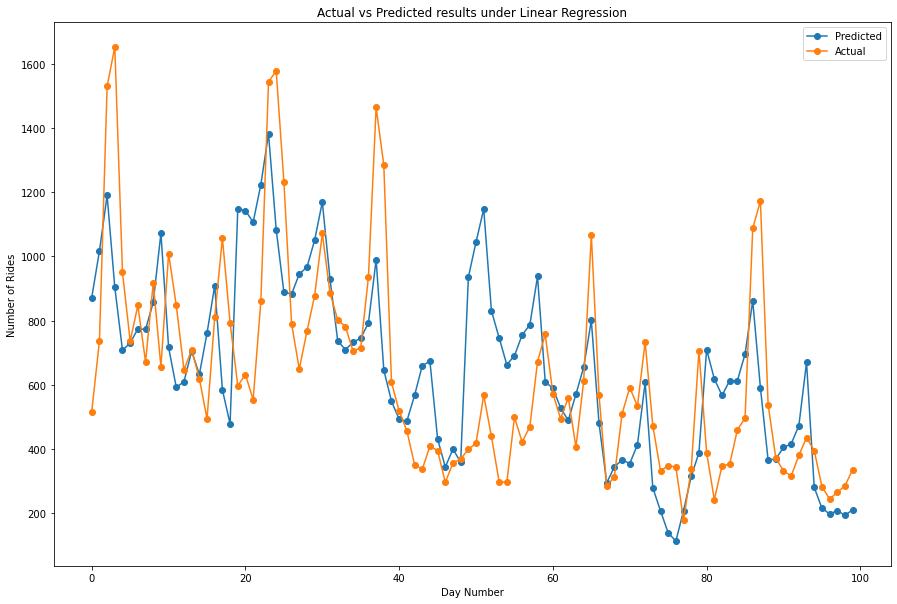

In [157]:
plt.figure(figsize=(15,10))
plt.title('Comparing Actual vs Predicted rides using Linear Regression')
plt.xlabel('Day Number')
plt.ylabel('Number of Rides')
plt.plot(linear_pred_df1.index.values, linear_pred_df1['Predicted'], '-o', label='Predicted')
plt.plot(linear_pred_df1.index.values, linear_pred_df1['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

In [158]:
print('Mean Absolute Error:', mean_absolute_error(y_test.values, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test.values, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test.values, y_pred)))
print('R-Square score:', r2_score(y_test.values, y_pred))

Mean Absolute Error: 216.74629077863233
Mean Squared Error: 75410.23891258313
Root Mean Squared Error: 274.60924768219866
R-Square score: 0.38918617149200185


In [159]:
X_train.describe()

,AvgTemp,HourNum,Precip.(inch),Snow(inch),TripDistance,TripDuration,DayOfWeek.0,DayOfWeek.1,DayOfWeek.2,DayOfWeek.3,DayOfWeek.4,DayOfWeek.5,DayOfWeek.6
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,59.656143,14.451390,0.659114,0.222371,1.164405,15.799377,0.144286,0.141429,0.140000,0.141429,0.144286,0.144286,0.144286
std,17.977223,1.828009,1.098692,0.712237,0.431130,6.062797,0.351630,0.348712,0.347235,0.348712,0.351630,0.351630,0.351630
min,12.650000,5.500000,0.000000,0.000000,0.349093,3.787671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.150000,13.384765,0.000000,0.000000,0.839933,10.764038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61.250000,14.325058,0.030000,0.000000,1.140893,16.224375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.187500,15.170068,0.917500,0.000000,1.457963,20.090958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.100000,20.234114,5.280000,4.490000,3.545000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


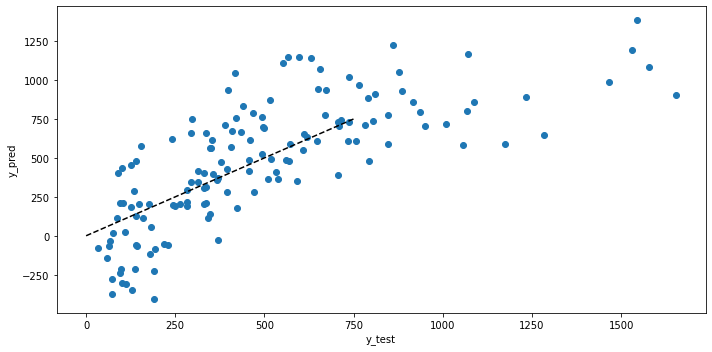

In [161]:
plt.figure(figsize=(10, 5))
    
plt.scatter(y_test.values, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.plot([0, 750], [0, 750], '--k')

plt.tight_layout()
plt.show()
plt.close()

### Ridge Regression

In [162]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [163]:
#Dataframe with Actual and Predicted values from test set
ridge_pred_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': ridge_pred})

In [164]:
#linear_pred_df.sort_index(inplace=True)
ridge_pred_df1 = ridge_pred_df.head(100)

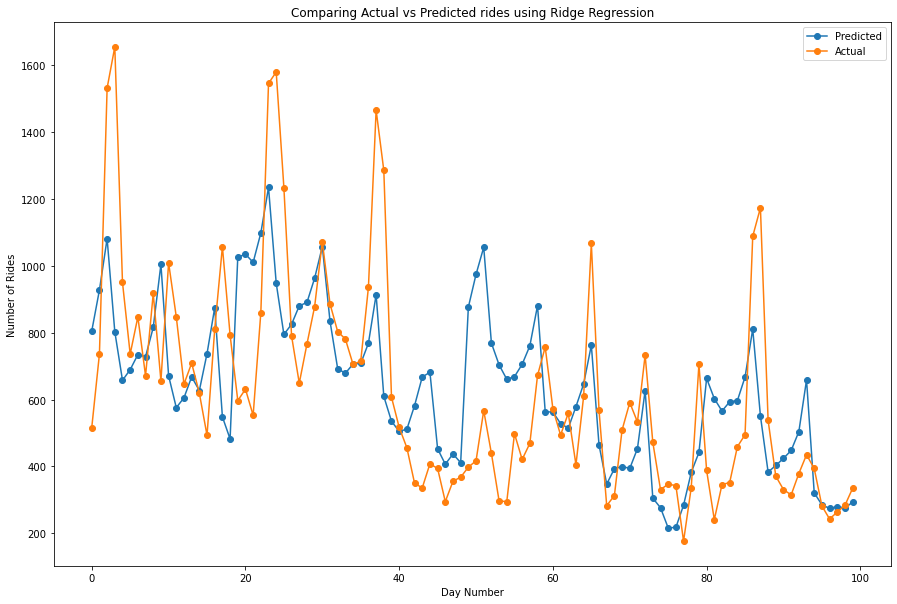

In [165]:
plt.figure(figsize=(15,10))
plt.title('Comparing Actual vs Predicted rides using Ridge Regression')
plt.xlabel('Day Number')
plt.ylabel('Number of Rides')
plt.plot(ridge_pred_df1.index.values, ridge_pred_df1['Predicted'], '-o', label='Predicted')
plt.plot(ridge_pred_df1.index.values, ridge_pred_df1['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

In [166]:
print('Mean Absolute Error:', mean_absolute_error(y_test.values, ridge_pred))  
print('Mean Squared Error:', mean_squared_error(y_test.values, ridge_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test.values, ridge_pred)))
print('R-Square score:', r2_score(y_test.values, ridge_pred))

Mean Absolute Error: 198.76903300736976
Mean Squared Error: 66867.16053054259
Root Mean Squared Error: 258.58685297312115
R-Square score: 0.4583840747081308


### Lasso Regression

In [167]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.39701263283087085

In [168]:
#Dataframe with Actual and Predicted values from test set
lasso_pred_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': lasso_pred})

In [169]:
#linear_pred_df.sort_index(inplace=True)
lasso_pred_df1 = lasso_pred_df.head(100)

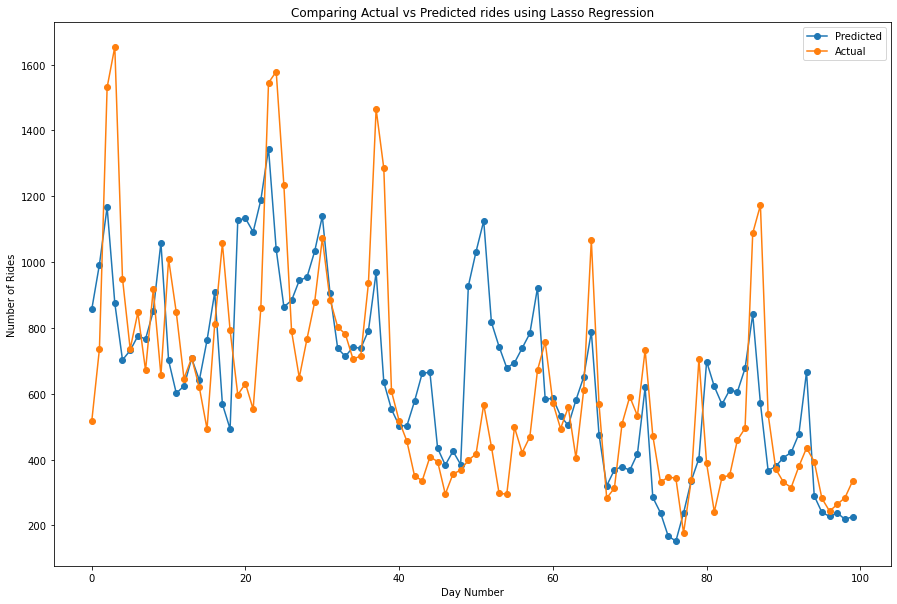

In [170]:
plt.figure(figsize=(15,10))
plt.title('Comparing Actual vs Predicted rides using Lasso Regression')
plt.xlabel('Day Number')
plt.ylabel('Number of Rides')
plt.plot(lasso_pred_df1.index.values, lasso_pred_df1['Predicted'], '-o', label='Predicted')
plt.plot(lasso_pred_df1.index.values, lasso_pred_df1['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

In [171]:
print('Mean Absolute Error:', mean_absolute_error(y_test, lasso_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, lasso_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, lasso_pred)))
print('R-Square score:', r2_score(y_test, lasso_pred))

Mean Absolute Error: 213.9420406729291
Mean Squared Error: 74443.99471204521
Root Mean Squared Error: 272.84426824114377
R-Square score: 0.39701263283087085


## Ensemble Methods

### Random Forest Regression

In [172]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rforest = RandomForestRegressor()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)

In [173]:
#Dataframe with Actual and Predicted values from test set
rforest_pred_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': rforest_pred})

In [174]:
#linear_pred_df.sort_index(inplace=True)
rforest_pred_df1 = rforest_pred_df.head(100)

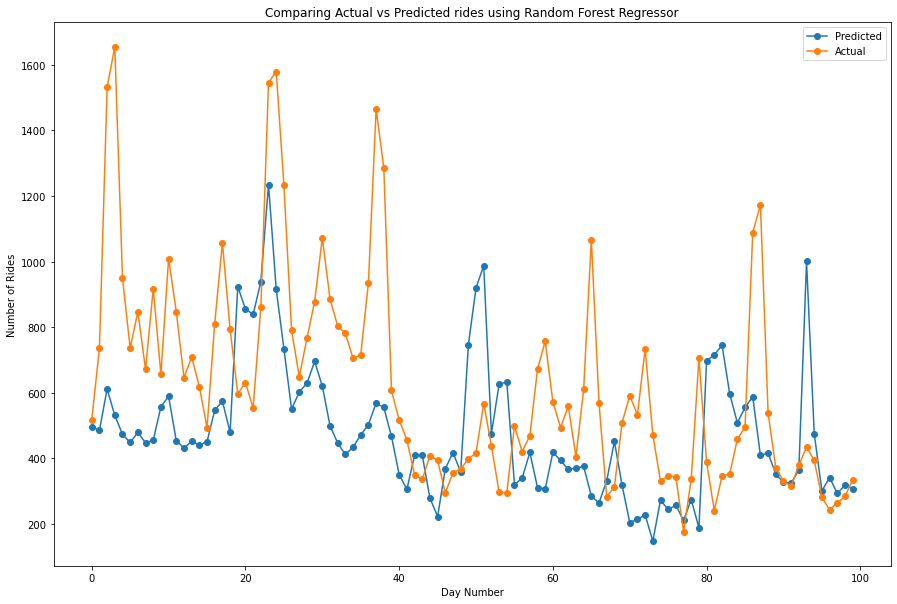

In [175]:
plt.figure(figsize=(15,10))
plt.title('Comparing Actual vs Predicted rides using Random Forest Regressor')
plt.xlabel('Day Number')
plt.ylabel('Number of Rides')
plt.plot(rforest_pred_df1.index.values, rforest_pred_df1['Predicted'], '-o', label='Predicted')
plt.plot(rforest_pred_df1.index.values, rforest_pred_df1['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

In [176]:
print('Mean Absolute Error:', mean_absolute_error(y_test.values, rforest_pred))  
print('Mean Squared Error:', mean_squared_error(y_test.values, rforest_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test.values, rforest_pred)))
print('R-Square score:', r2_score(y_test.values, rforest_pred))

Mean Absolute Error: 212.08141843971632
Mean Squared Error: 89163.24588794325
Root Mean Squared Error: 298.60215318705133
R-Square score: 0.2777884758308733


### Gradient Boosting Regression

In [177]:
gboost = GradientBoostingRegressor()
gboost.fit(X_train, y_train)
gboost_pred = gboost.predict(X_test)

In [178]:
#Dataframe with Actual and Predicted values from test set
gboost_pred_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': gboost_pred})

In [179]:
#linear_pred_df.sort_index(inplace=True)
gboost_pred_df1 = gboost_pred_df.head(100)

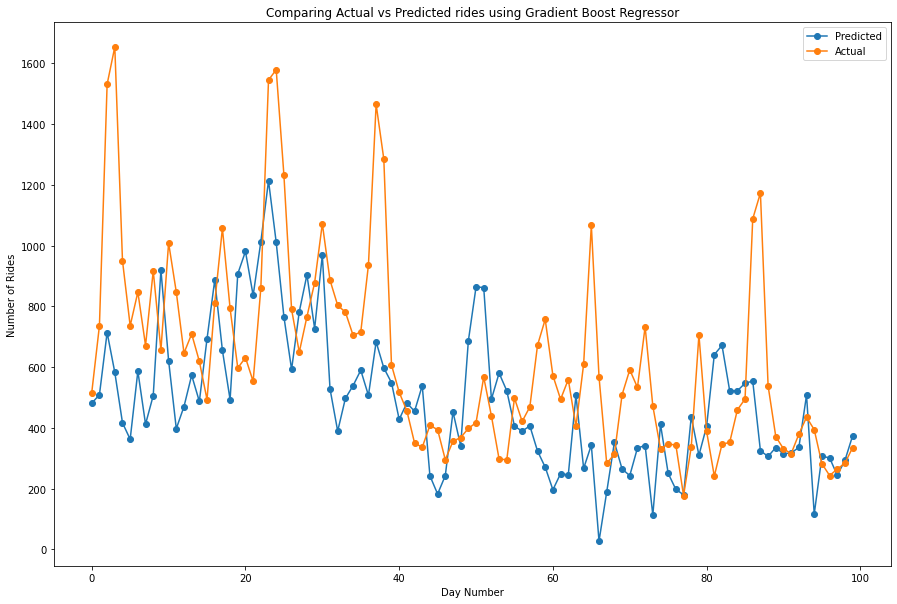

In [180]:
plt.figure(figsize=(15,10))
plt.title('Comparing Actual vs Predicted rides using Gradient Boost Regressor')
plt.xlabel('Day Number')
plt.ylabel('Number of Rides')
plt.plot(gboost_pred_df1.index.values, gboost_pred_df1['Predicted'], '-o', label='Predicted')
plt.plot(gboost_pred_df1.index.values, gboost_pred_df1['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

In [181]:
print('Mean Absolute Error:', mean_absolute_error(y_test.values, gboost_pred))  
print('Mean Squared Error:', mean_squared_error(y_test.values, gboost_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test.values, gboost_pred)))
print('R-Square score:', r2_score(y_test.values, gboost_pred))

Mean Absolute Error: 201.1592617681075
Mean Squared Error: 78962.08040650013
Root Mean Squared Error: 281.00192242491886
R-Square score: 0.36041668431841056


## Comparing Models

In [182]:
linear_rmse = np.sqrt(mean_squared_error(y_test.values, y_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test.values, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test.values, lasso_pred))
rforest_rmse = np.sqrt(mean_squared_error(y_test.values, rforest_pred))
gboost_rmse = np.sqrt(mean_squared_error(y_test.values, gboost_pred))

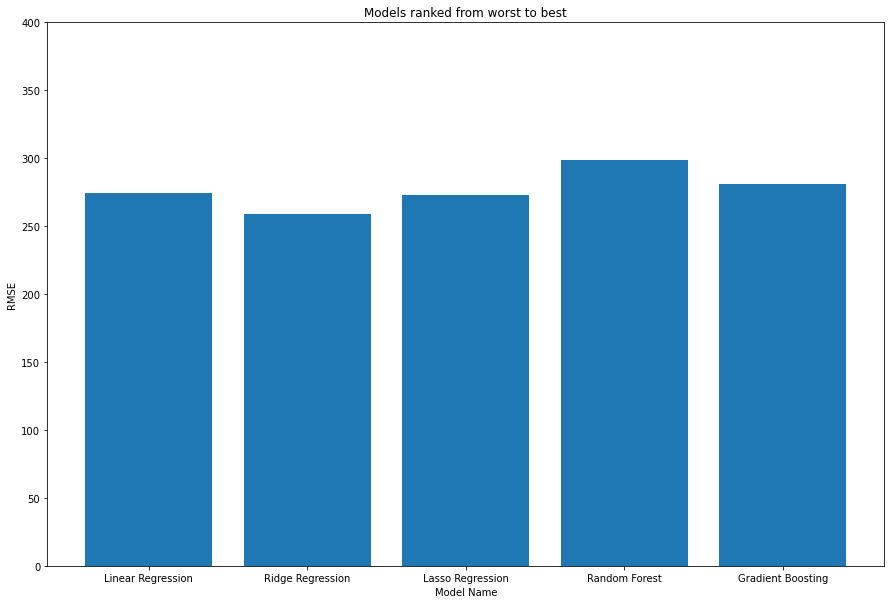

In [183]:
plt.figure(figsize=(15,10))
#data for bar chart
height = [linear_rmse, ridge_rmse, lasso_rmse, rforest_rmse, gboost_rmse]
bars = ('Linear Regression', 'Ridge Regression','Lasso Regression','Random Forest', "Gradient Boosting"  )
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
 
# Add title and axis names
plt.title('Models ranked from worst to best')
plt.xlabel('Model Name')
plt.ylabel('RMSE')
 
# Limits for the Y axis
plt.ylim(0,400)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()